Counting Repeatitions

In [1]:
# Importing the necessary libraries into the environment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from DataTransformation import LowPassFilter
from scipy.signal import argrelextrema
from sklearn.metrics import mean_absolute_error

In [2]:
pd.options.mode.chained_assignment = None

In [3]:
# Plot Settings
plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = (20,5)
plt.rcParams["figure.dpi"] = 100
plt.rcParams["lines.linewidth"] = 2

In [ ]:
# Loading the dataset into the environment
df = pd.read_pickle("processed_data.pkl")

# Displaying the rows of the dataframe
df.head()

acc_x     acc_y     acc_z  ...  label  category  set
epoch (ms)                                             ...                      
2019-01-11 15:08:05.200  0.013500  0.977000 -0.071000  ...  bench     heavy   30
2019-01-11 15:08:05.400 -0.001500  0.970500 -0.079500  ...  bench     heavy   30
2019-01-11 15:08:05.600  0.001333  0.971667 -0.064333  ...  bench     heavy   30
2019-01-11 15:08:05.800 -0.024000  0.957000 -0.073500  ...  bench     heavy   30
2019-01-11 15:08:06.000 -0.028000  0.957667 -0.115000  ...  bench     heavy   30
...                           ...       ...       ...  ...    ...       ...  ...
2019-01-20 17:33:27.000 -0.048000 -1.041500 -0.076500  ...    row    medium   90
2019-01-20 17:33:27.200 -0.037000 -1.030333 -0.053333  ...    row    medium   90
2019-01-20 17:33:27.400 -0.060000 -1.031000 -0.082000  ...    row    medium   90
2019-01-20 17:33:27.600 -0.038667 -1.025667 -0.044667  ...    row    medium   90
2019-01-20 17:33:27.800 -0.044000 -1.034000 -0.059000  ...    row    medium   90

[9009 rows x 10 columns]

In [ ]:
# Removing the records of rest from the dataframe
df = df[ df["label"] != "rest"]
df

acc_x     acc_y     acc_z  ...  label  category  set
epoch (ms)                                             ...                      
2019-01-11 15:08:05.200  0.013500  0.977000 -0.071000  ...  bench     heavy   30
2019-01-11 15:08:05.400 -0.001500  0.970500 -0.079500  ...  bench     heavy   30
2019-01-11 15:08:05.600  0.001333  0.971667 -0.064333  ...  bench     heavy   30
2019-01-11 15:08:05.800 -0.024000  0.957000 -0.073500  ...  bench     heavy   30
2019-01-11 15:08:06.000 -0.028000  0.957667 -0.115000  ...  bench     heavy   30
...                           ...       ...       ...  ...    ...       ...  ...
2019-01-20 17:33:27.000 -0.048000 -1.041500 -0.076500  ...    row    medium   90
2019-01-20 17:33:27.200 -0.037000 -1.030333 -0.053333  ...    row    medium   90
2019-01-20 17:33:27.400 -0.060000 -1.031000 -0.082000  ...    row    medium   90
2019-01-20 17:33:27.600 -0.038667 -1.025667 -0.044667  ...    row    medium   90
2019-01-20 17:33:27.800 -0.044000 -1.034000 -0.059000  ...    row    medium   90

[7899 rows x 10 columns]

In [9]:
acc_r = df["acc_x"] **2 +  df["acc_y"] **2 + df["acc_z"] **2
gyro_r = df["gyro_x"] **2 + df["gyro_y"] ** 2 + df["gyro_z"] ** 2
df["acc_r"] = np.sqrt(acc_r)
df["gyro_r"] = np.sqrt(gyro_r)

In [10]:
# Split the data
bench_df = df[df["label"] =="bench"]
squat_df = df[df["label"] =="squat"]
row_df = df[df["label"] =="row"]
ohp_df = df[df["label"] =="ohp"]
dead_df = df[df["label"] =="dead"]

<Axes: xlabel='epoch (ms)'>

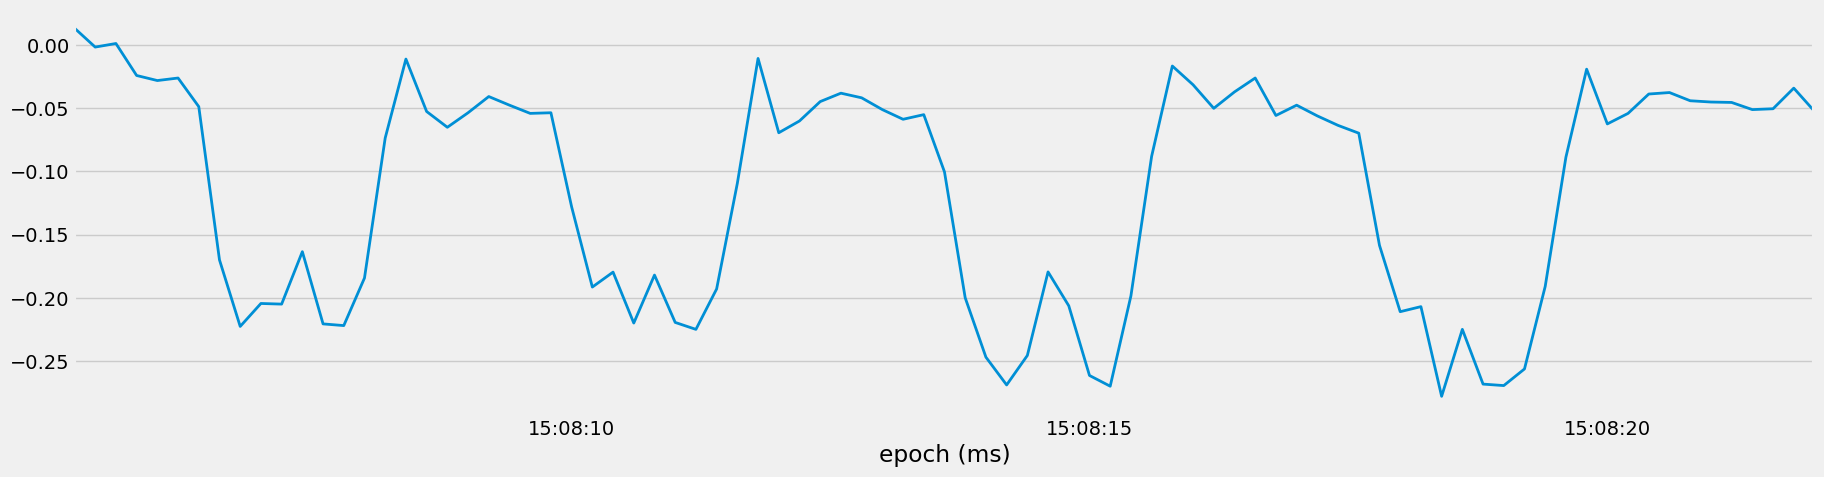

In [14]:
# Visualize the data to undestand the patterns
plot_df = bench_df

plot_df[plot_df["set"] == plot_df["set"].unique()[0]]["acc_x"].plot()

<Axes: xlabel='epoch (ms)'>

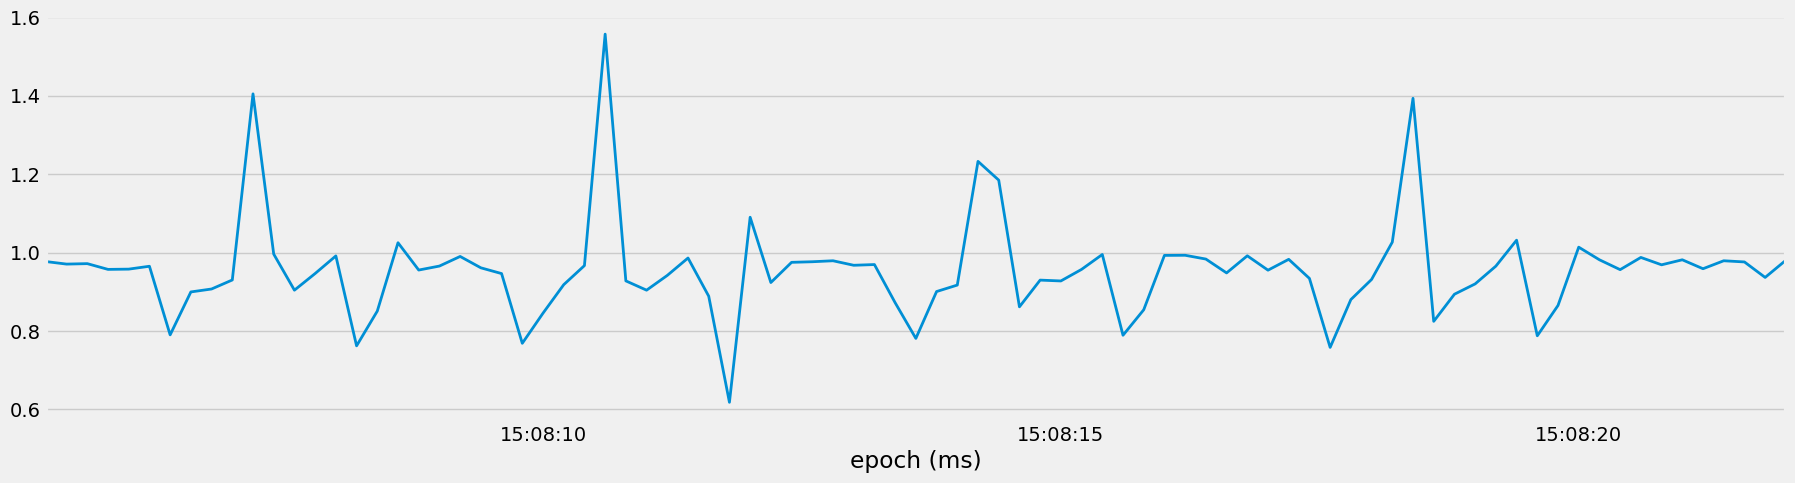

In [15]:
plot_df[plot_df["set"] == plot_df["set"].unique()[0]]["acc_y"].plot()

<Axes: xlabel='epoch (ms)'>

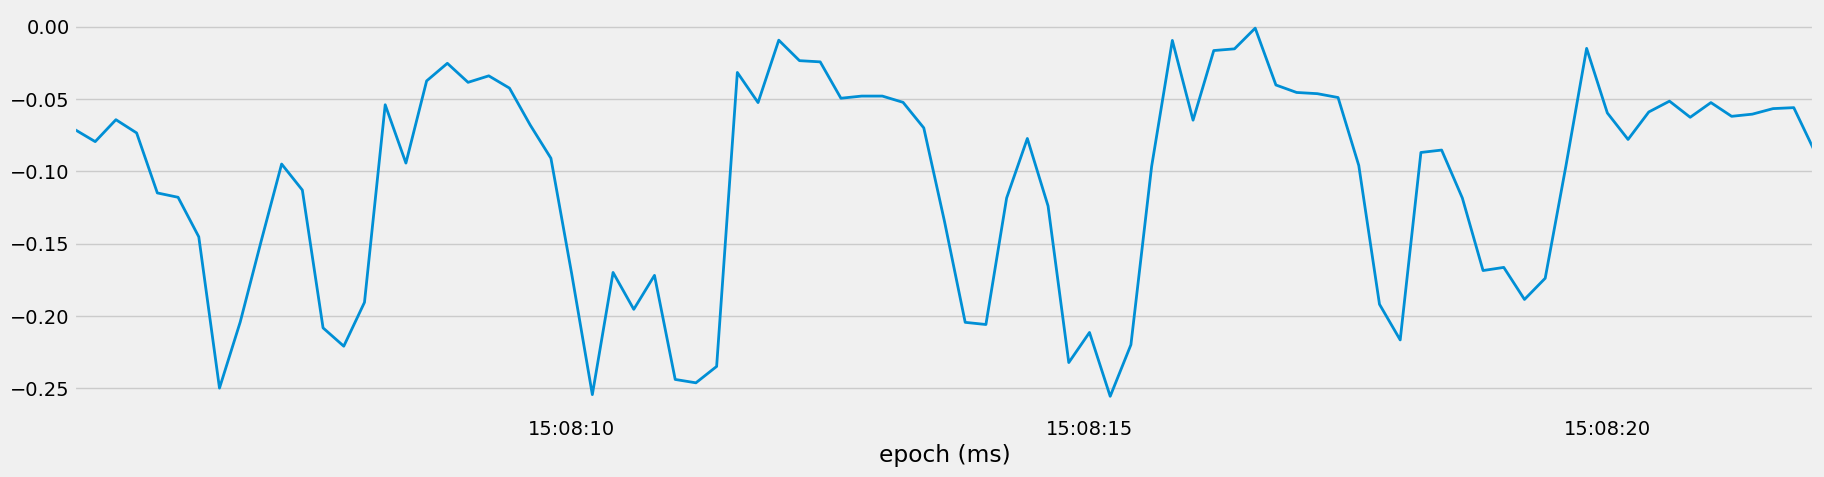

In [16]:
plot_df[plot_df["set"] == plot_df["set"].unique()[0]]["acc_z"].plot()

<Axes: xlabel='epoch (ms)'>

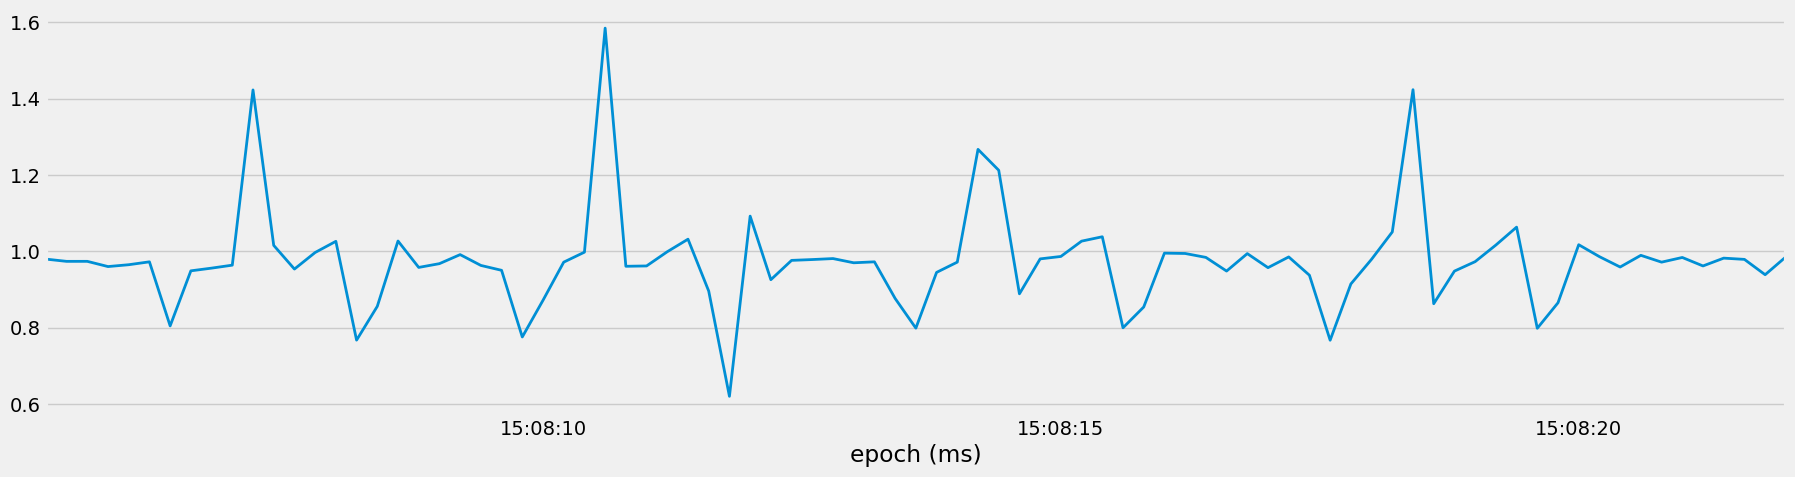

In [17]:
plot_df[plot_df["set"] == plot_df["set"].unique()[0]]["acc_r"].plot()

<Axes: xlabel='epoch (ms)'>

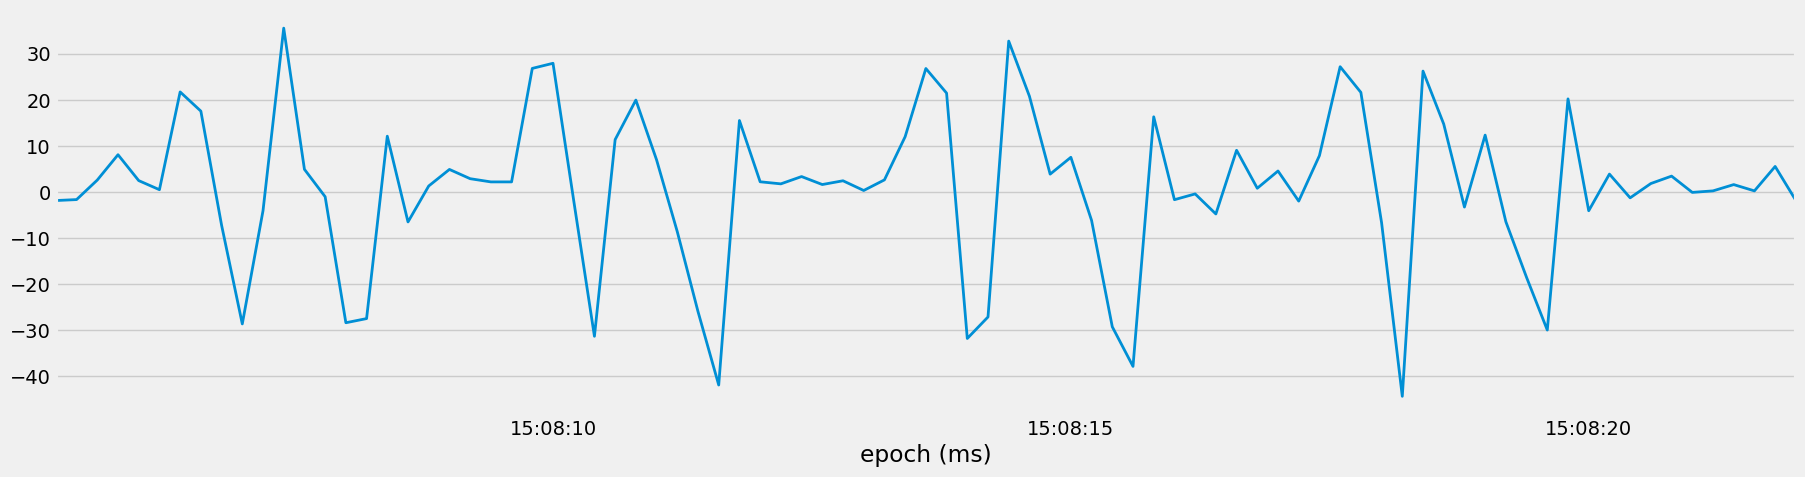

In [18]:
plot_df[plot_df["set"] == plot_df["set"].unique()[0]]["gyro_x"].plot()

<Axes: xlabel='epoch (ms)'>

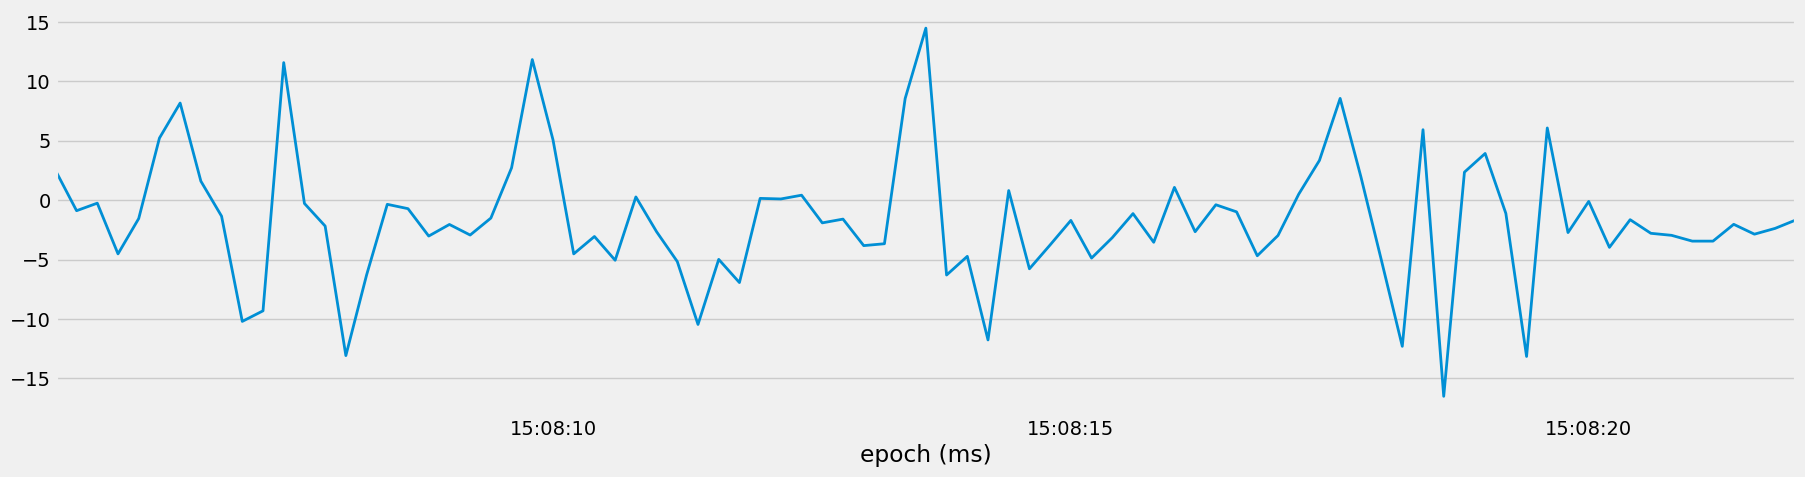

In [20]:
plot_df[plot_df["set"] == plot_df["set"].unique()[0]]["gyro_y"].plot()

<Axes: xlabel='epoch (ms)'>

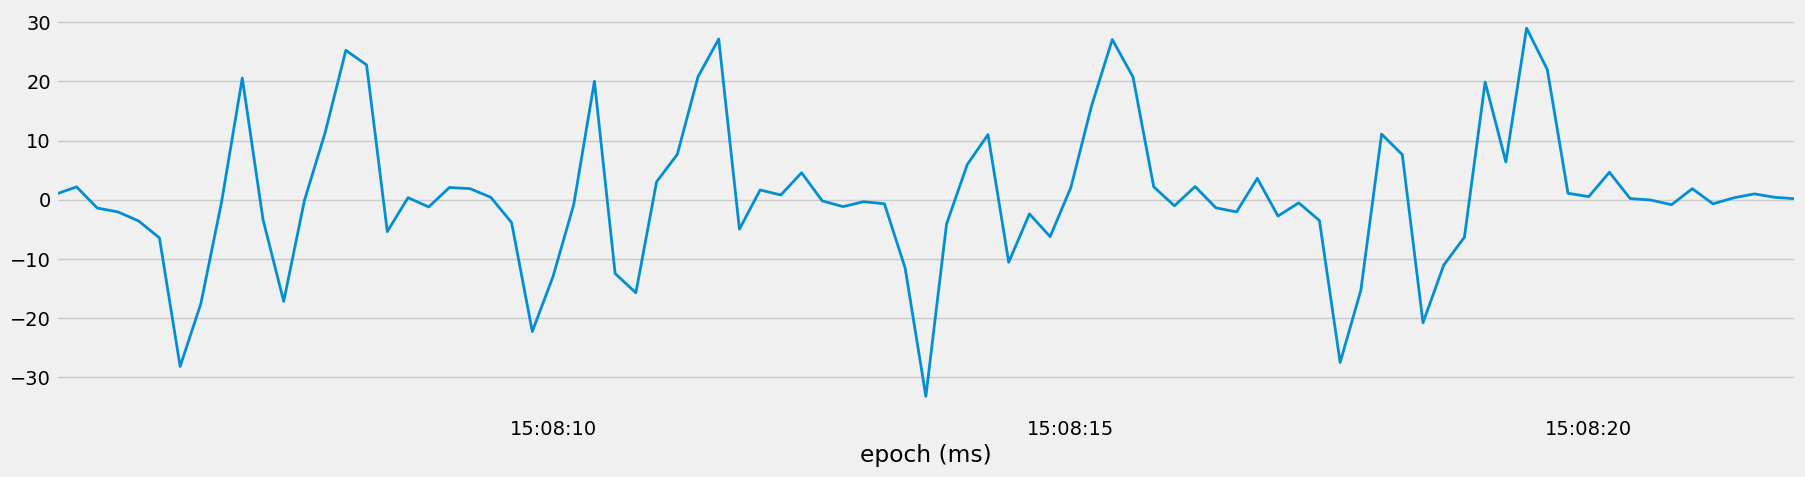

In [21]:
plot_df[plot_df["set"] == plot_df["set"].unique()[0]]["gyro_z"].plot()

<Axes: xlabel='epoch (ms)'>

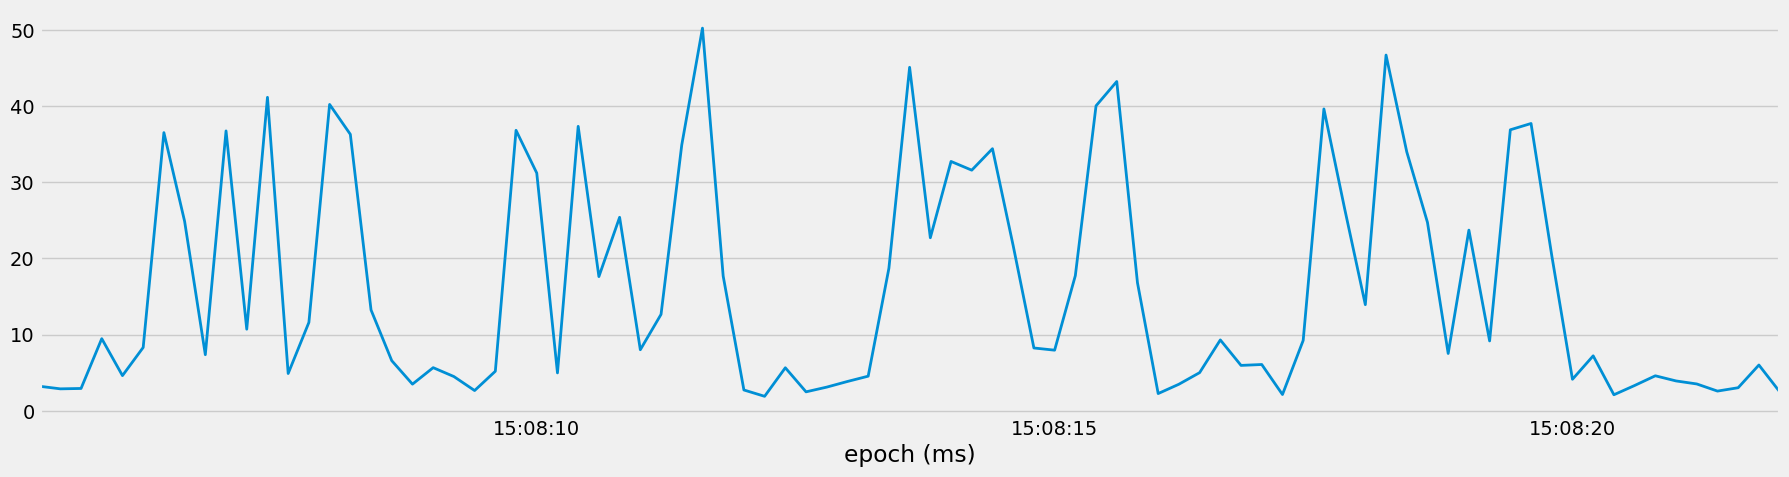

In [23]:
plot_df[plot_df["set"] == plot_df["set"].unique()[0]]["gyro_r"].plot()

In [24]:
# Configuring the LowPass Filter
fs = 1000/200
lowpass = LowPassFilter()

In [26]:
# Apply and Tweak LowPass filter
bench_set = bench_df[bench_df["set"] == bench_df["set"].unique()[0]]
squat_set = squat_df[squat_df["set"] == squat_df["set"].unique()[0]]
row_set = row_df[row_df["set"] == row_df["set"].unique()[0]]
ohp_set = ohp_df[ohp_df["set"] == ohp_df["set"].unique()[0]]
dead_set = dead_df[dead_df["set"] == ohp_df["set"].unique()[0]]

<Axes: xlabel='epoch (ms)'>

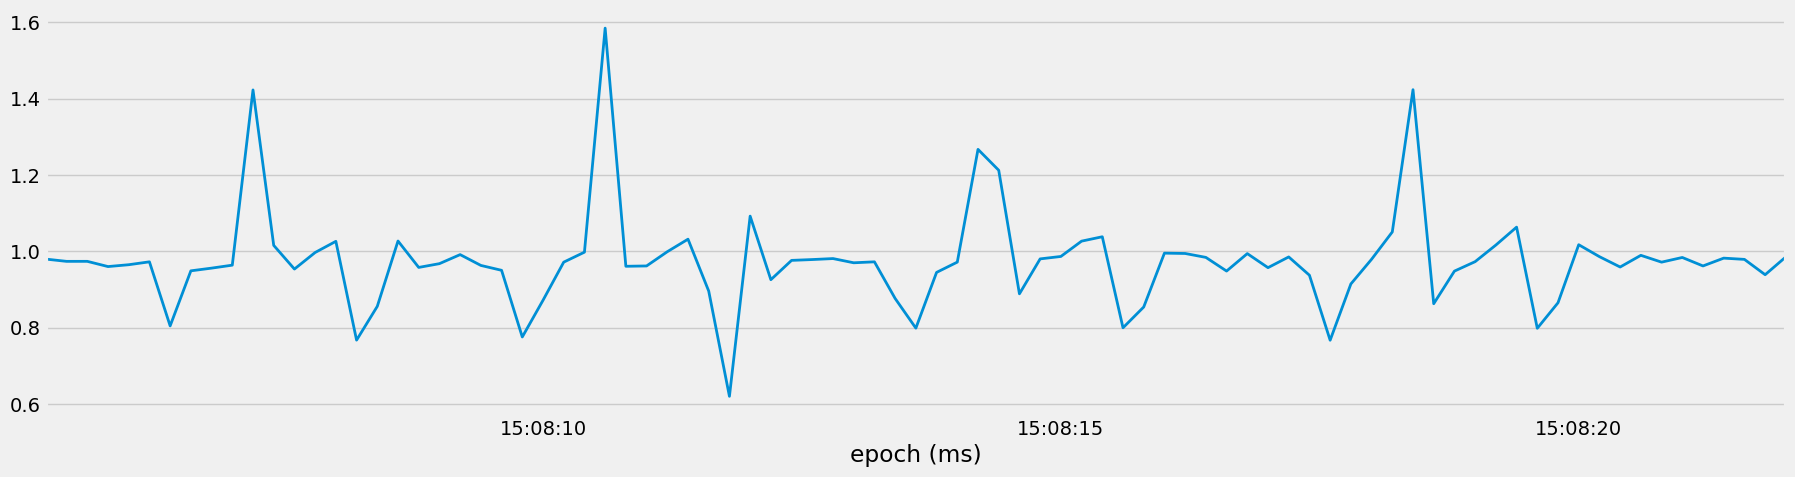

In [27]:
bench_set["acc_r"].plot()

In [31]:
column = "acc_r"
lowpass.low_pass_filter(bench_set, col = column,sampling_frequency = fs, cutoff_frequency=0.4, order=5)

acc_x     acc_y  ...    gyro_r  acc_r_lowpass
epoch (ms)                                   ...                         
2019-01-11 15:08:05.200  0.013500  0.977000  ...  3.225625       0.981060
2019-01-11 15:08:05.400 -0.001500  0.970500  ...  2.887270       0.961606
2019-01-11 15:08:05.600  0.001333  0.971667  ...  2.936720       0.945699
2019-01-11 15:08:05.800 -0.024000  0.957000  ...  9.473502       0.936613
2019-01-11 15:08:06.000 -0.028000  0.957667  ...  4.623585       0.936412
...                           ...       ...  ...       ...            ...
2019-01-11 15:08:21.200 -0.045333  0.958667  ...  3.529012       0.980293
2019-01-11 15:08:21.400 -0.051000  0.979000  ...  2.592911       0.983985
2019-01-11 15:08:21.600 -0.050333  0.976000  ...  3.034609       0.986107
2019-01-11 15:08:21.800 -0.034000  0.936500  ...  6.015949       0.987137
2019-01-11 15:08:22.000 -0.052333  0.980333  ...  2.518656       0.987620

[85 rows x 13 columns]

<Axes: xlabel='epoch (ms)'>

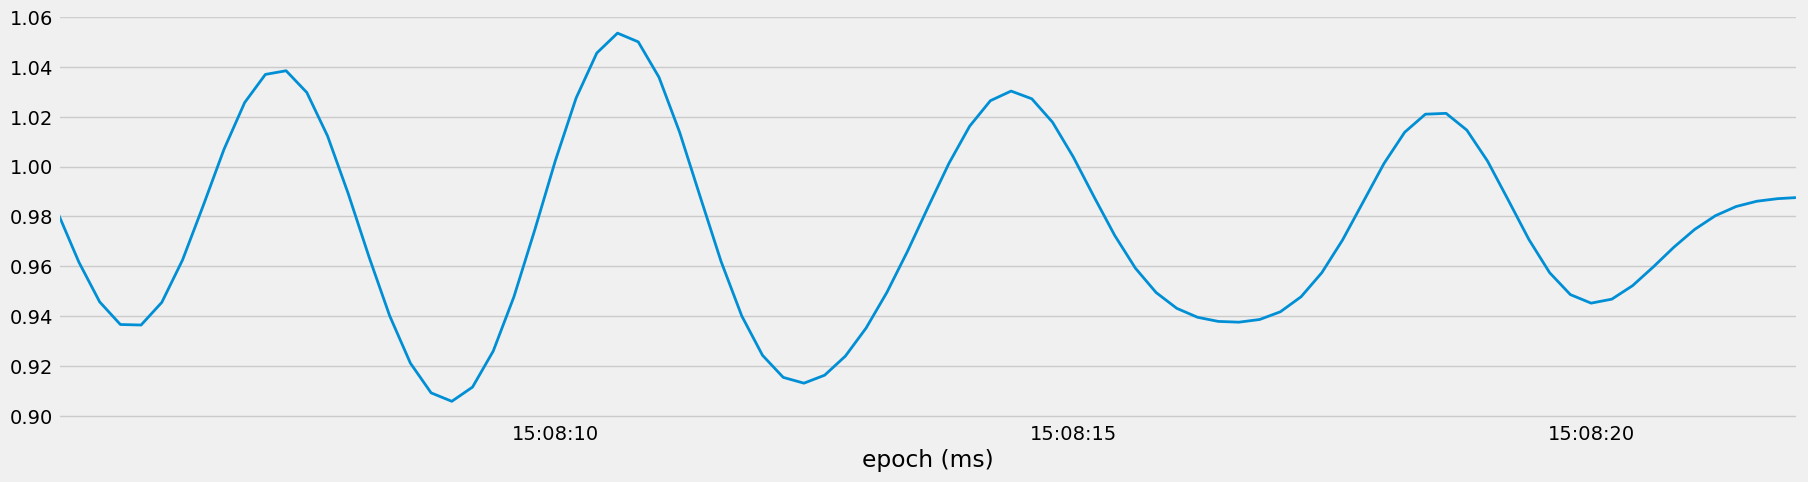

In [ ]:
lowpass.low_pass_filter(bench_set, col = column,sampling_frequency = fs, cutoff_frequency=0.4, order=5)[column + "_lowpass"].plot() # bench

<Axes: xlabel='epoch (ms)'>

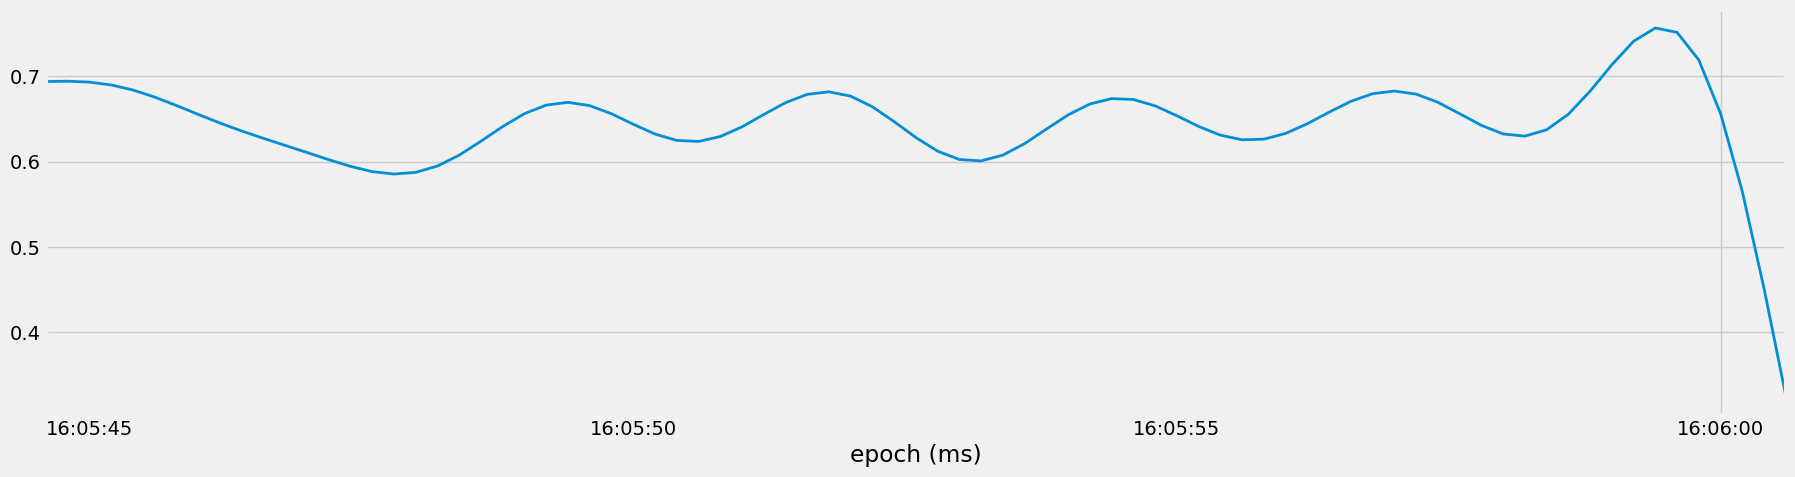

In [34]:
lowpass.low_pass_filter(squat_set, col = column,sampling_frequency = fs, cutoff_frequency=0.4, order=5)[column + "_lowpass"].plot() # squat

<Axes: xlabel='epoch (ms)'>

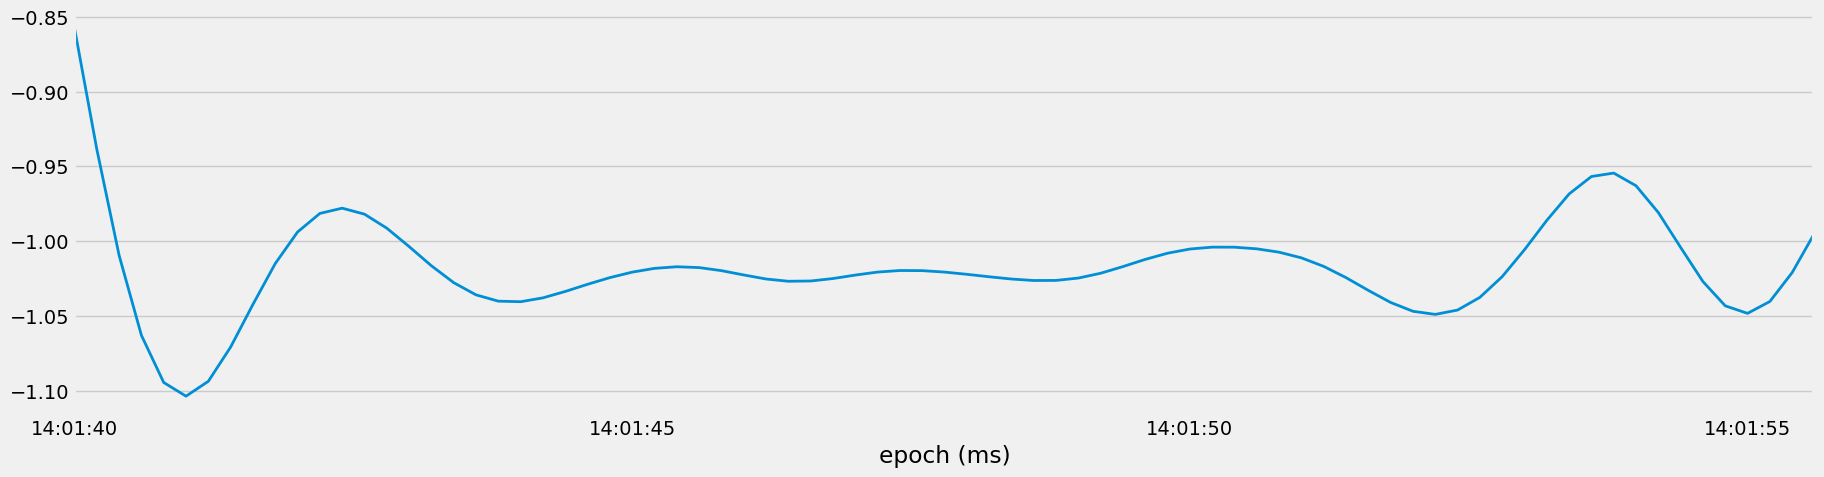

In [35]:
lowpass.low_pass_filter(row_set, col = column,sampling_frequency = fs, cutoff_frequency=0.4, order=5)[column + "_lowpass"].plot() # row

<Axes: xlabel='epoch (ms)'>

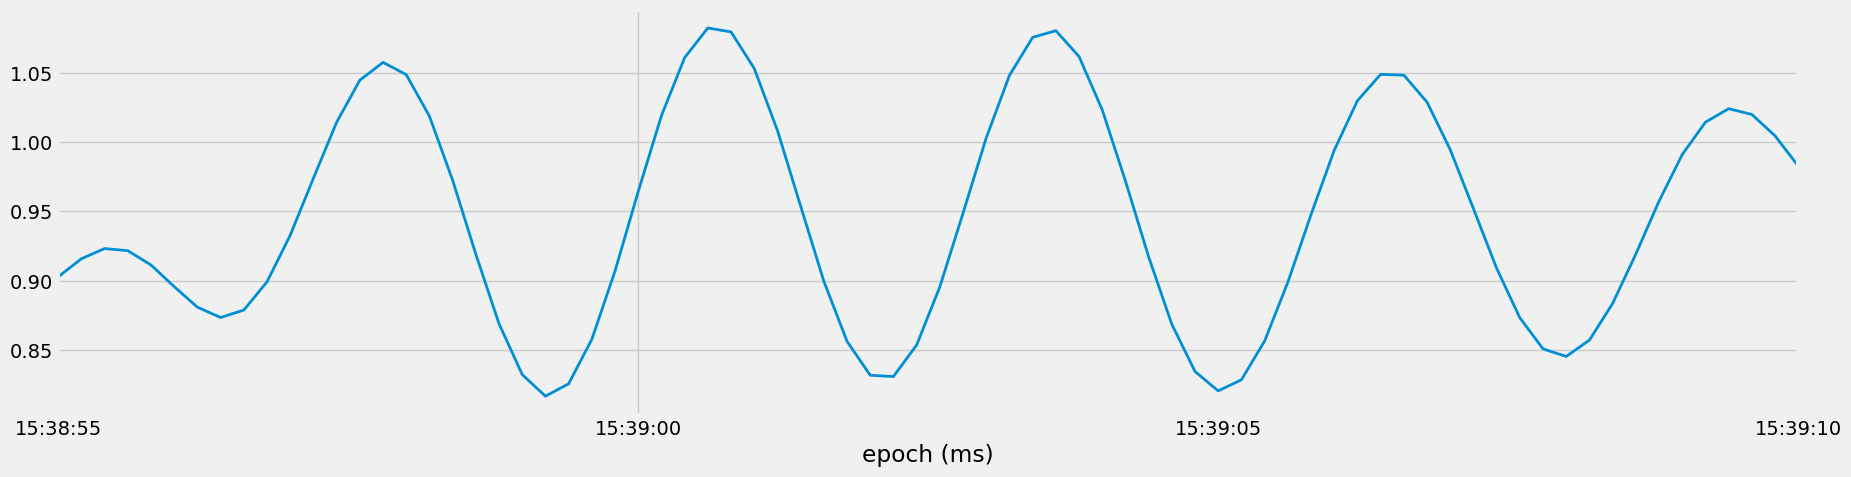

In [36]:
lowpass.low_pass_filter(ohp_set, col = column,sampling_frequency = fs, cutoff_frequency=0.4, order=5)[column + "_lowpass"].plot() # ohp

In [51]:
# Creating a function to count the repeatitions

def count_reps(dataset, cutoff=0.4, order=10, column="acc_r"):
    
    # Apply low-pass filter
    filtered_df = lowpass.low_pass_filter(
        dataset.copy(),
        col=column,
        sampling_frequency=fs,
        cutoff_frequency=cutoff,
        order=order
    )

    signal = filtered_df[column + "_lowpass"]

    # Find peaks
    indexes = argrelextrema(signal.values, np.greater)[0]
    peaks = signal.iloc[indexes]

    # Plot
    fig, ax = plt.subplots(figsize=(12,4))
    ax.plot(signal, label="Low-pass signal")
    ax.plot(peaks.index, peaks.values, "o", color="red", label="Peaks")

    ax.set_ylabel(f"{column}_lowpass")

    exercise = filtered_df["label"].iloc[0].title()
    category = filtered_df["category"].iloc[0].title()
    ax.set_title(f"{category} {exercise}: {len(peaks)} Reps")

    ax.legend()
    plt.show()

    return len(peaks)

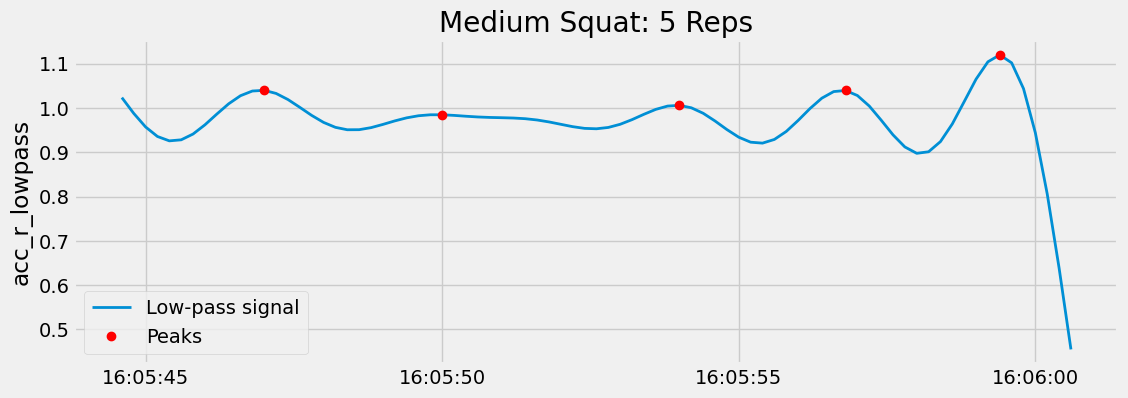

5

In [58]:
count_reps(squat_set, cutoff=0.35)

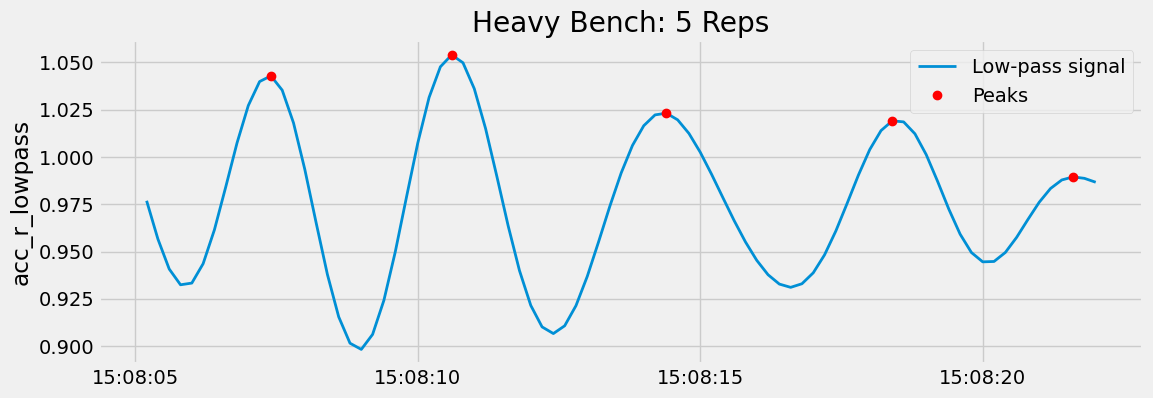

5

In [53]:
count_reps(bench_set)

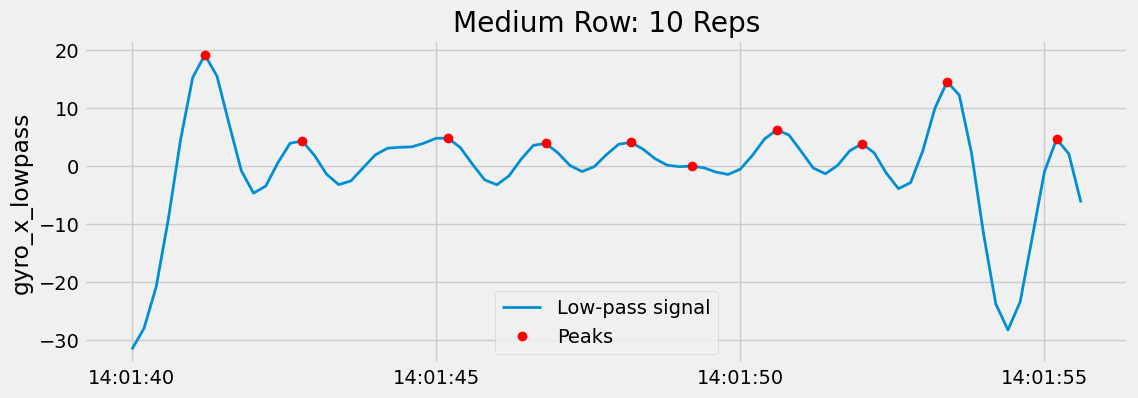

10

In [62]:
count_reps(row_set, cutoff=0.65,column= "gyro_x")

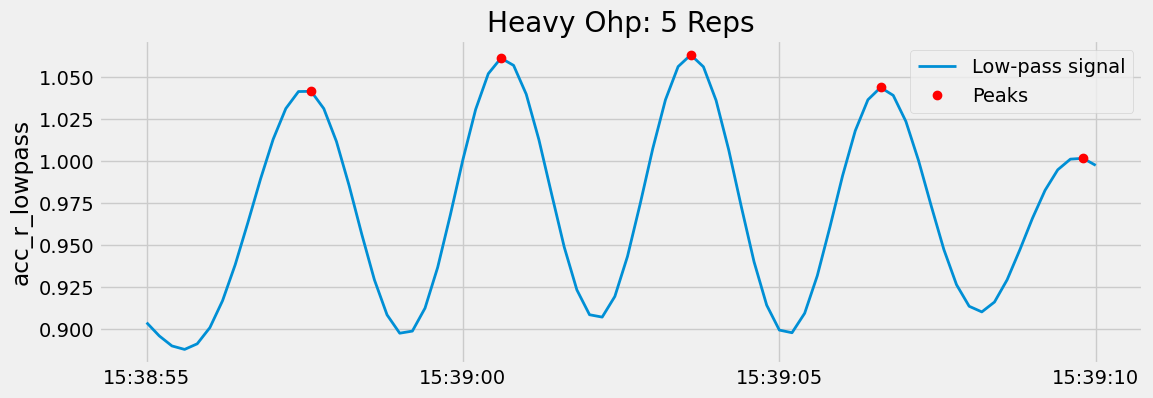

5

In [63]:
count_reps(ohp_set, cutoff=0.35)

In [65]:
# Creating a benchmak dataframe
df["reps"] = df["category"].apply(lambda x:5 if x=="heavy" else 10)
df["reps"]

epoch (ms)
2019-01-11 15:08:05.200     5
2019-01-11 15:08:05.400     5
2019-01-11 15:08:05.600     5
2019-01-11 15:08:05.800     5
2019-01-11 15:08:06.000     5
                           ..
2019-01-20 17:33:27.000    10
2019-01-20 17:33:27.200    10
2019-01-20 17:33:27.400    10
2019-01-20 17:33:27.600    10
2019-01-20 17:33:27.800    10
Name: reps, Length: 7899, dtype: int64

In [69]:
rep_df = df.groupby(["label","category","set"])["reps"].max().reset_index()
rep_df["reps_pred"] = 0
rep_df

label category  set  reps  reps_pred
0   bench    heavy    1     5          0
1   bench    heavy    2     5          0
2   bench    heavy    3     5          0
3   bench    heavy    4     5          0
4   bench    heavy   30     5          0
..    ...      ...  ...   ...        ...
80  squat   medium   28    10          0
81  squat   medium   29    10          0
82  squat   medium   38    10          0
83  squat   medium   63    10          0
84  squat   medium   64    10          0

[85 rows x 5 columns]

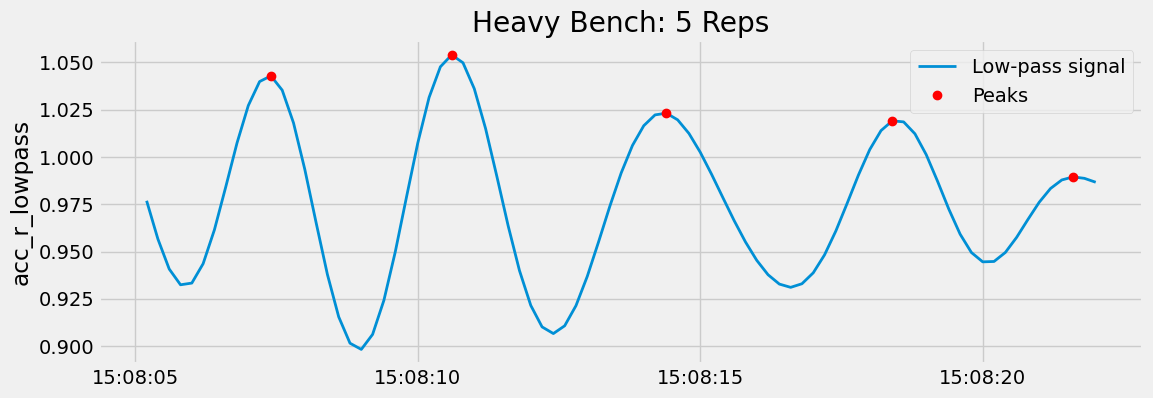

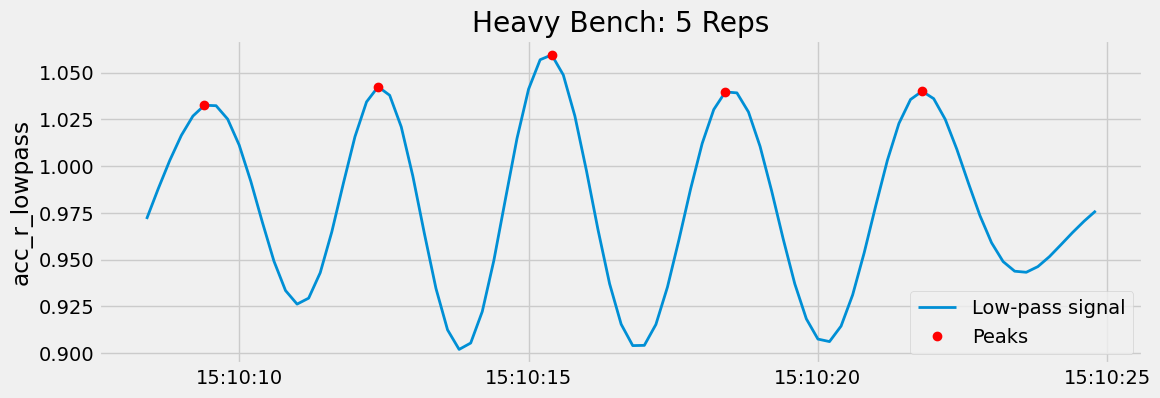

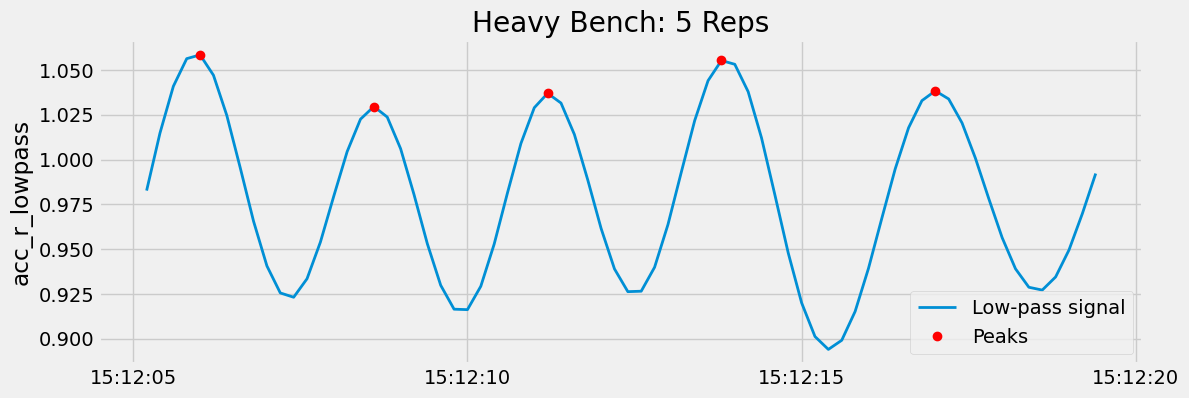

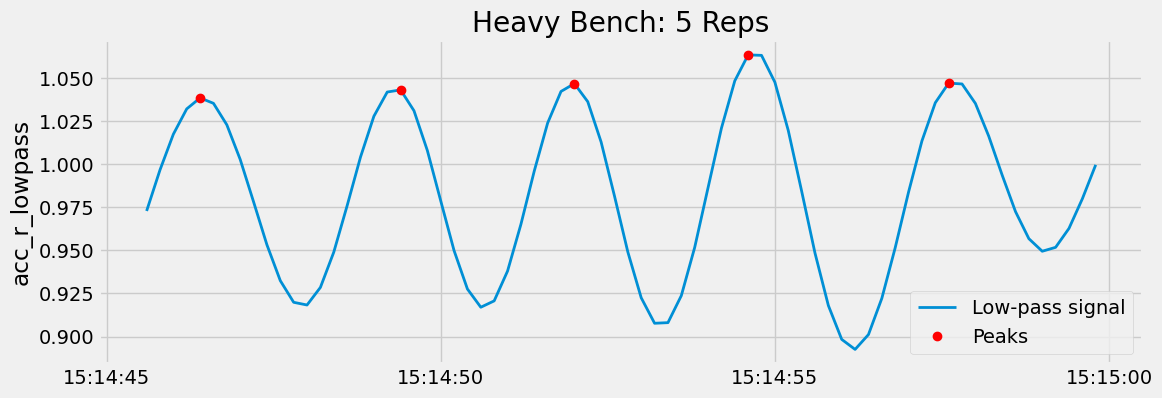

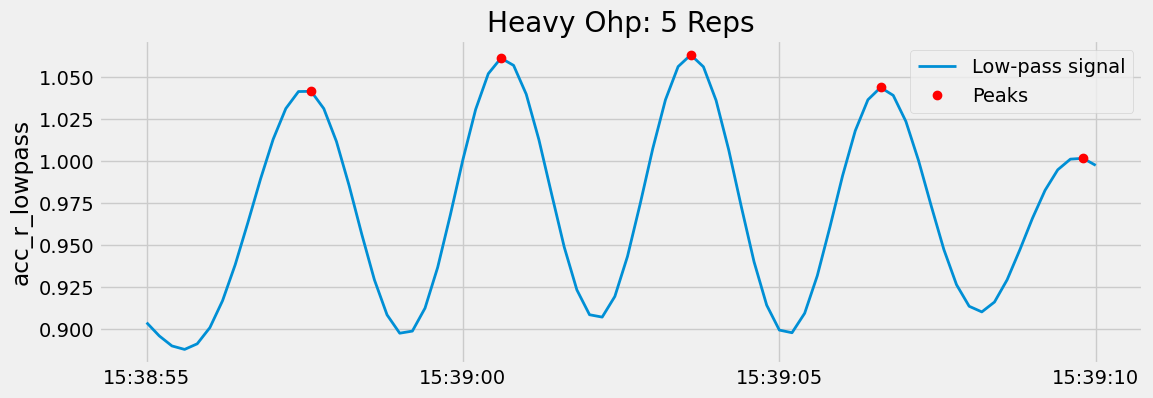

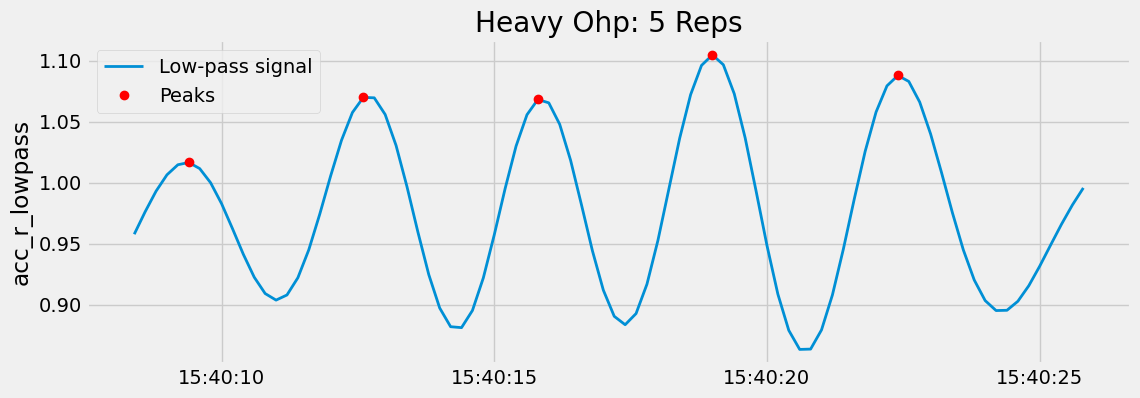

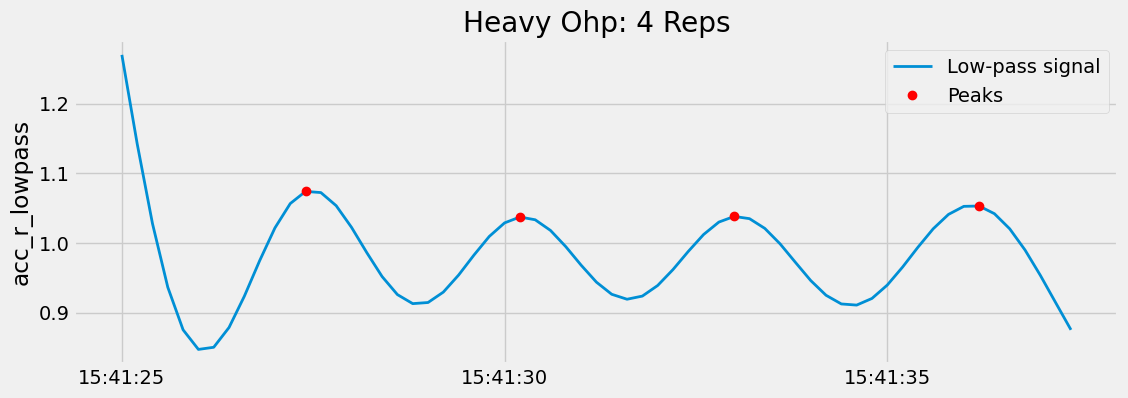

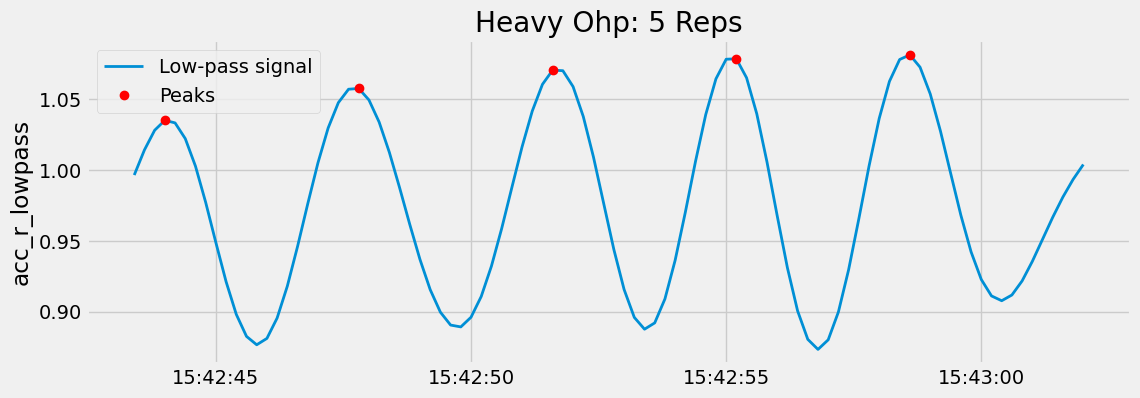

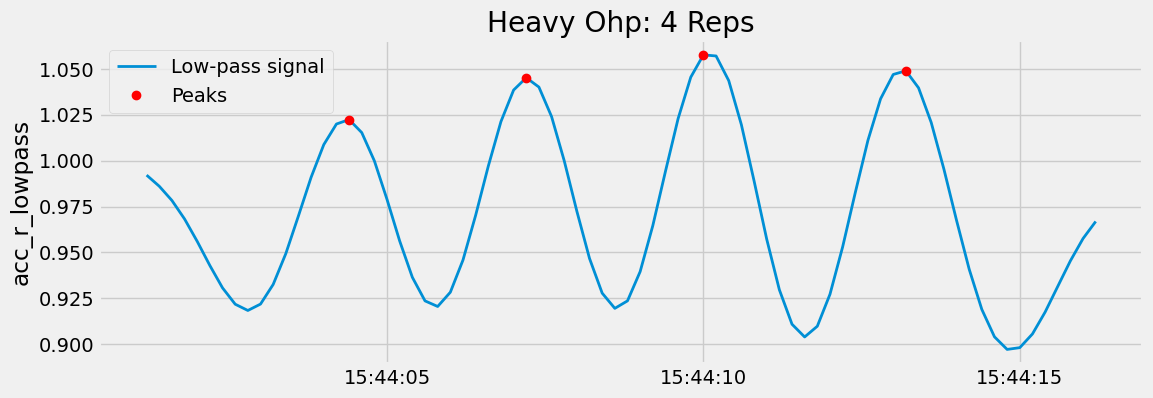

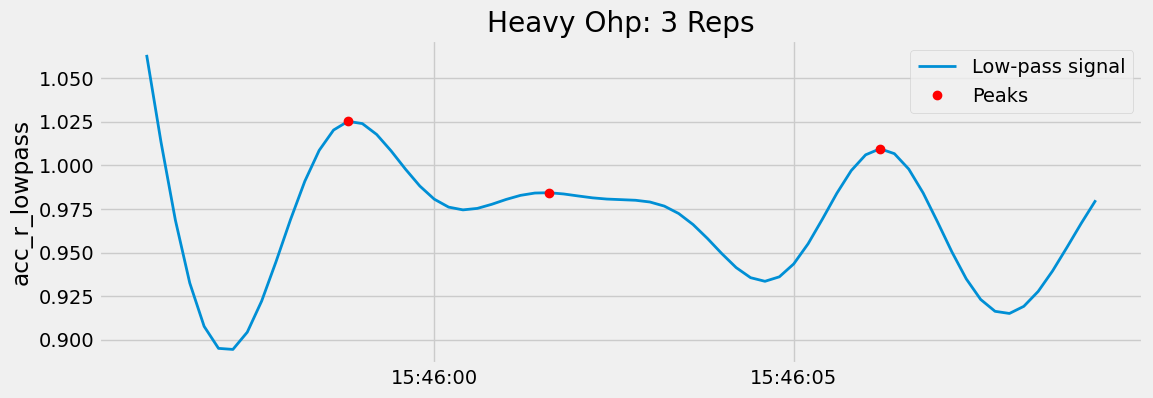

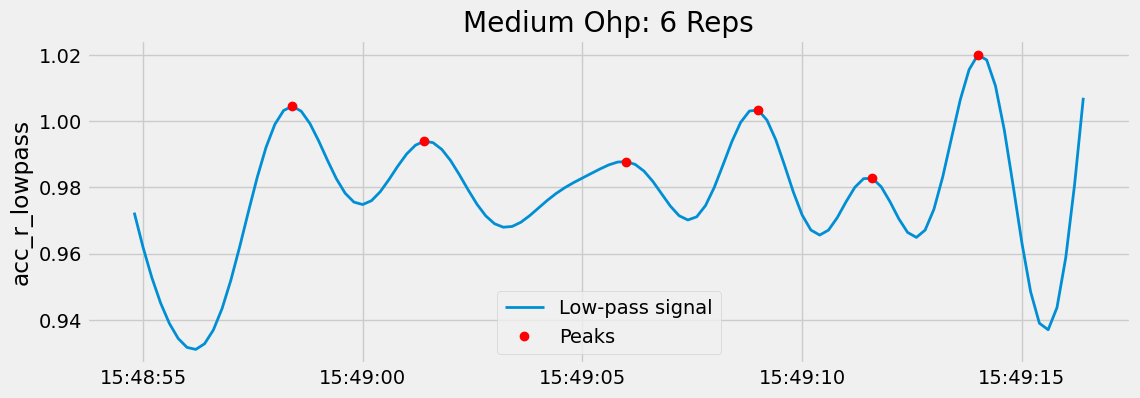

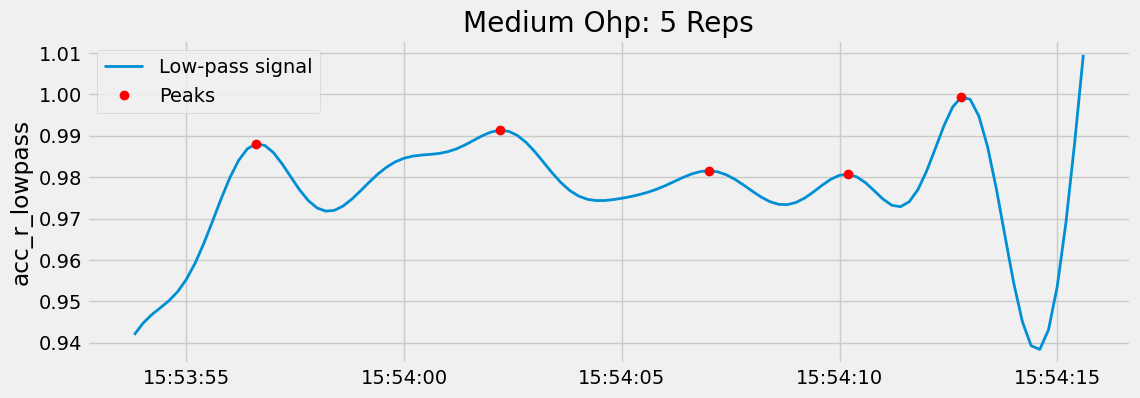

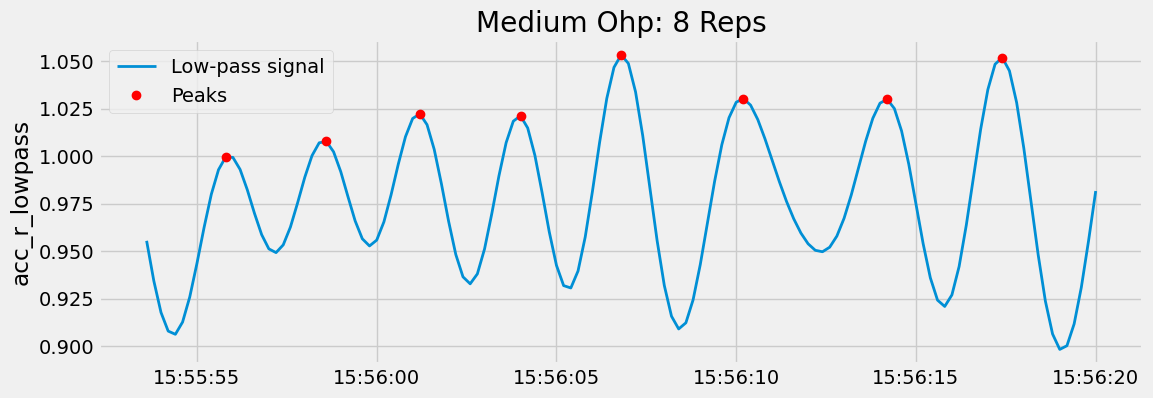

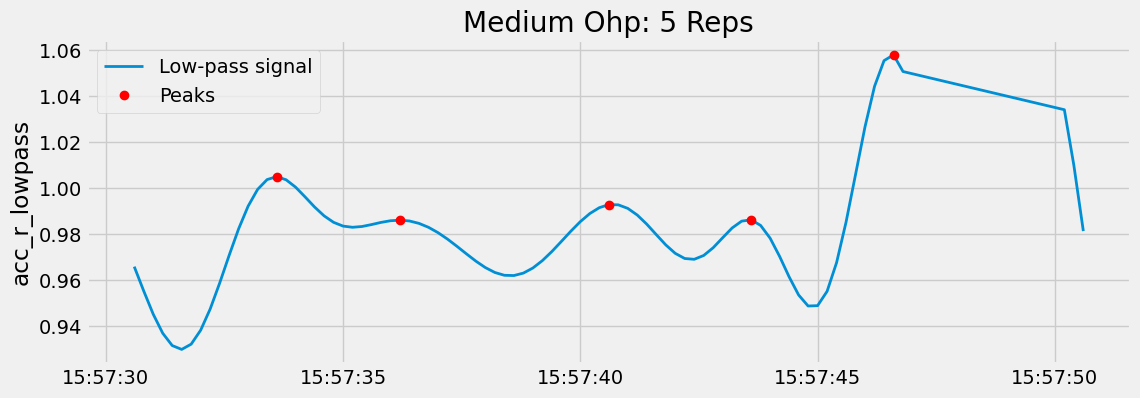

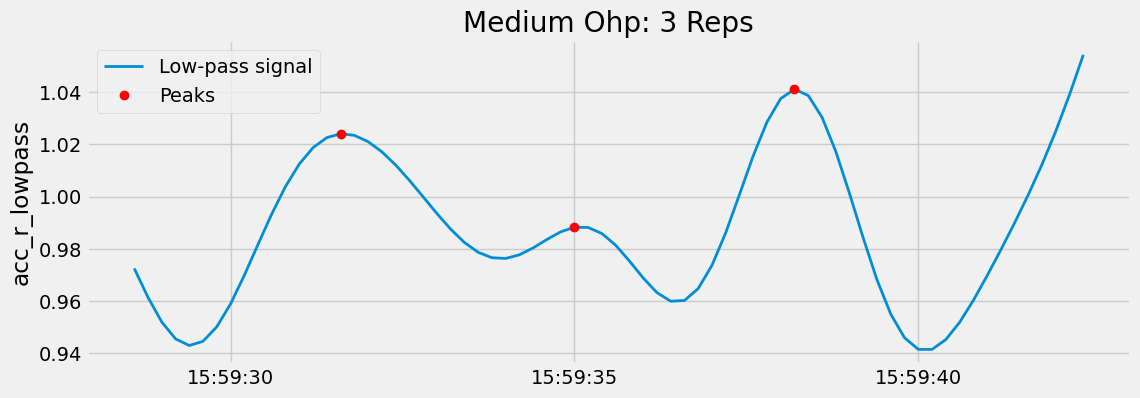

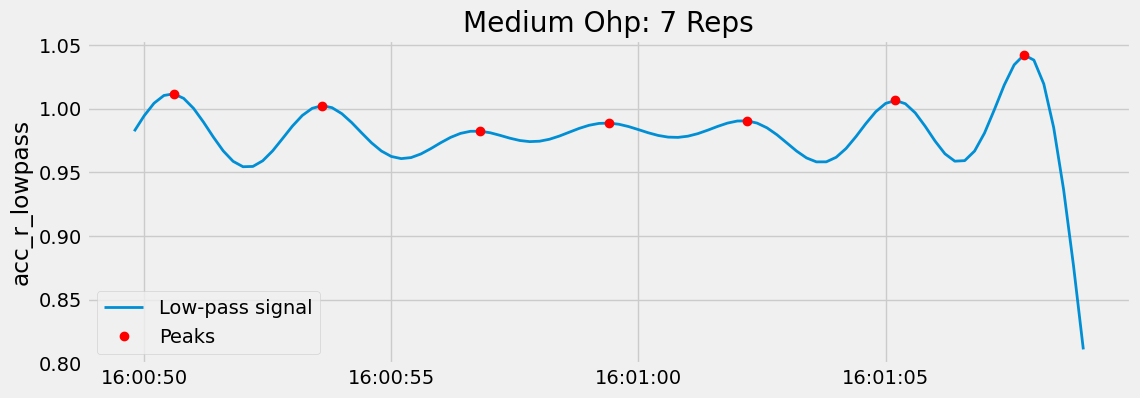

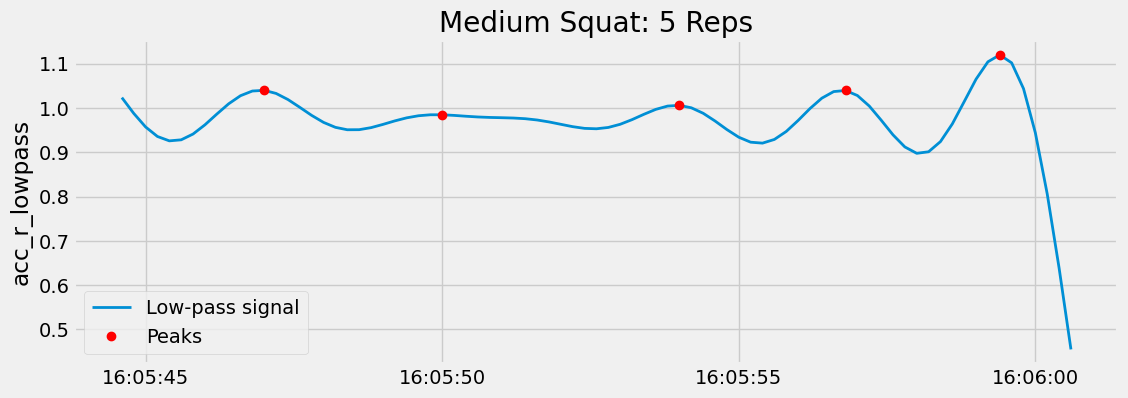

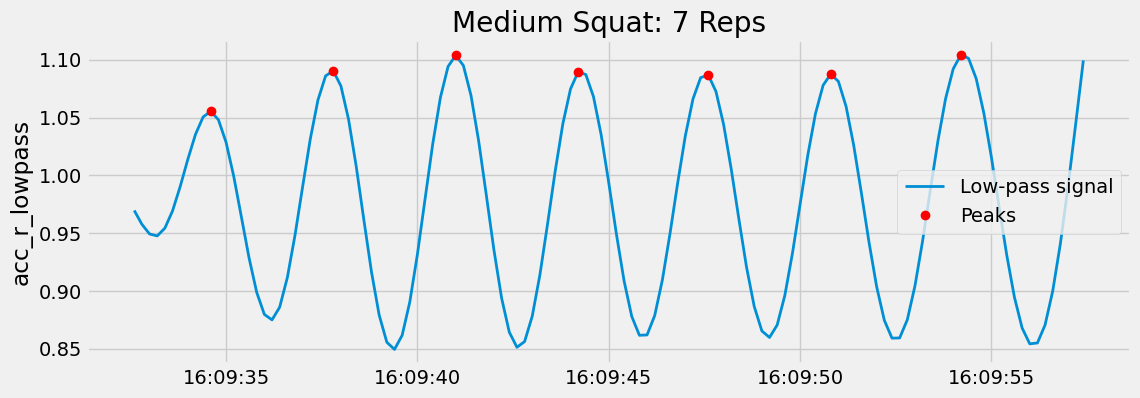

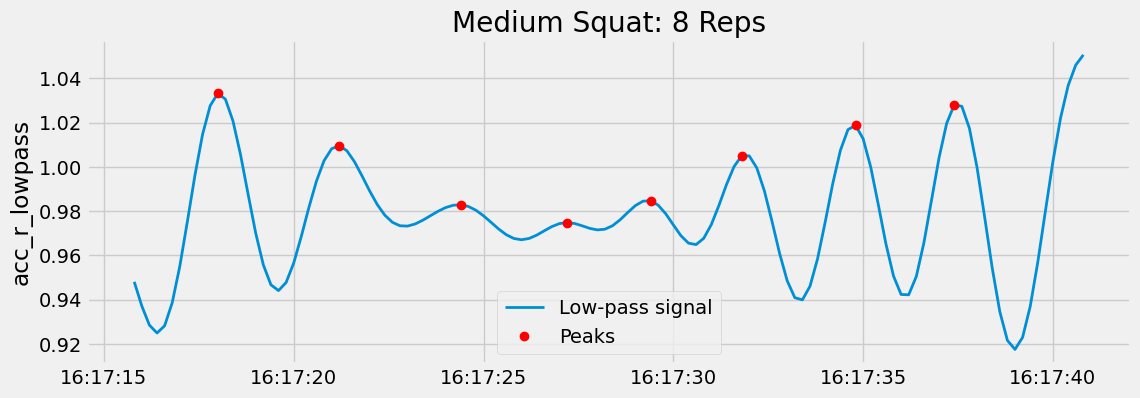

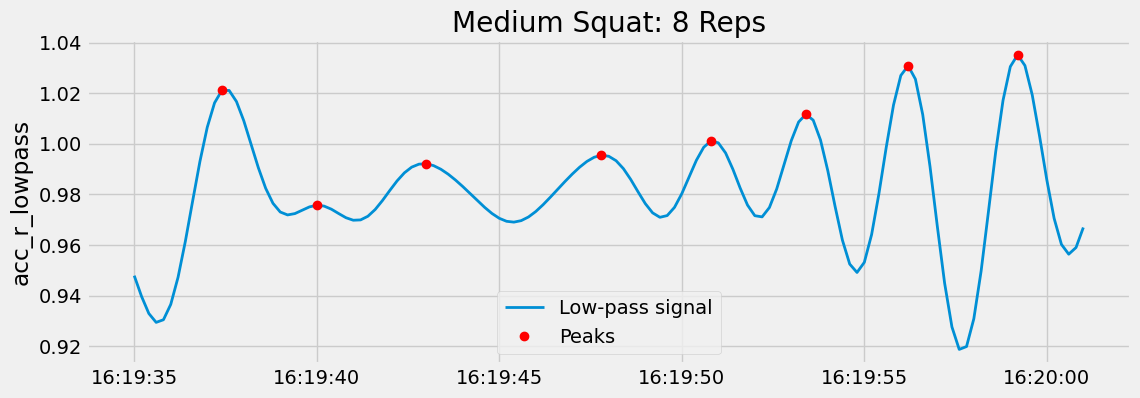

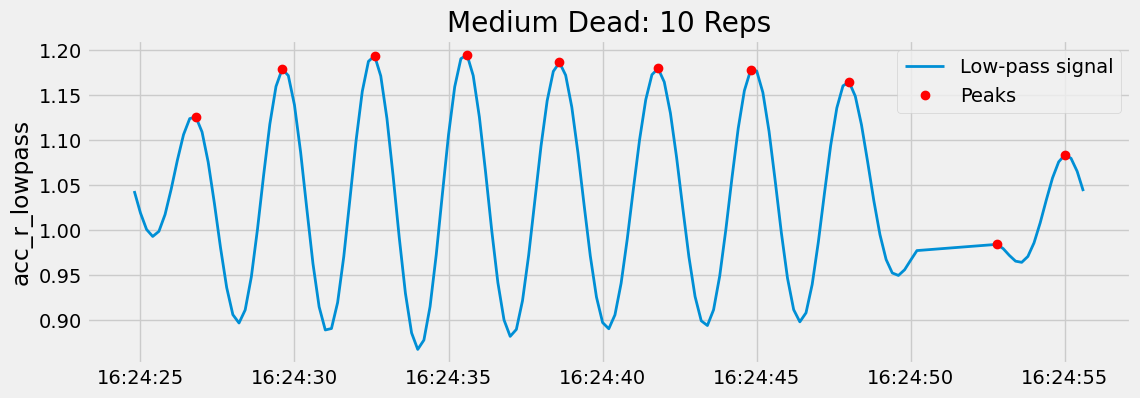

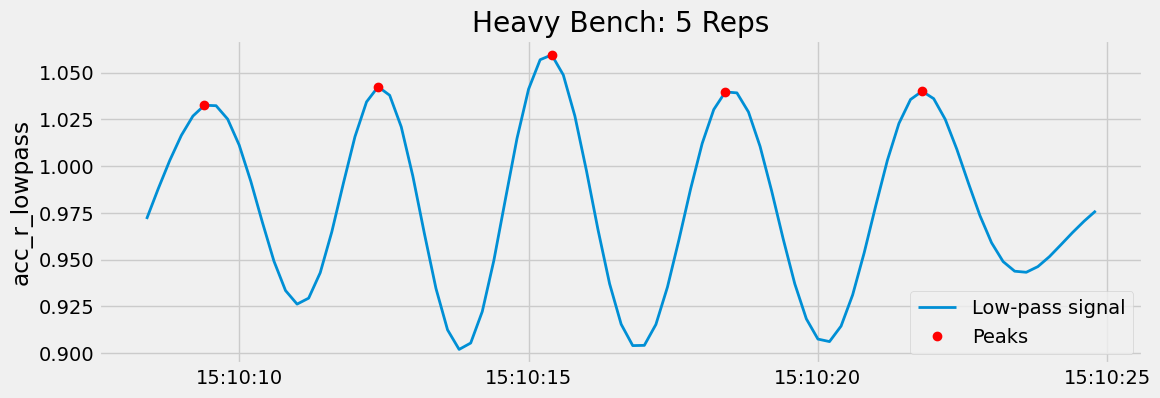

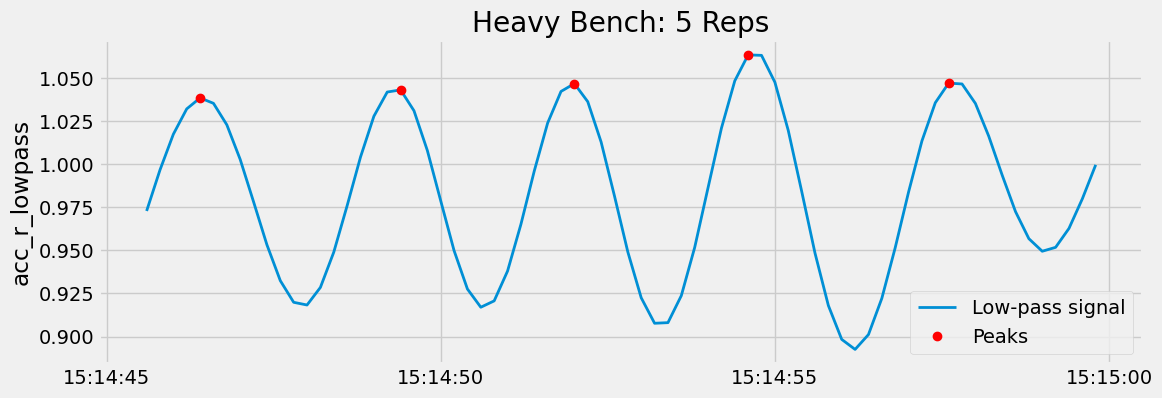

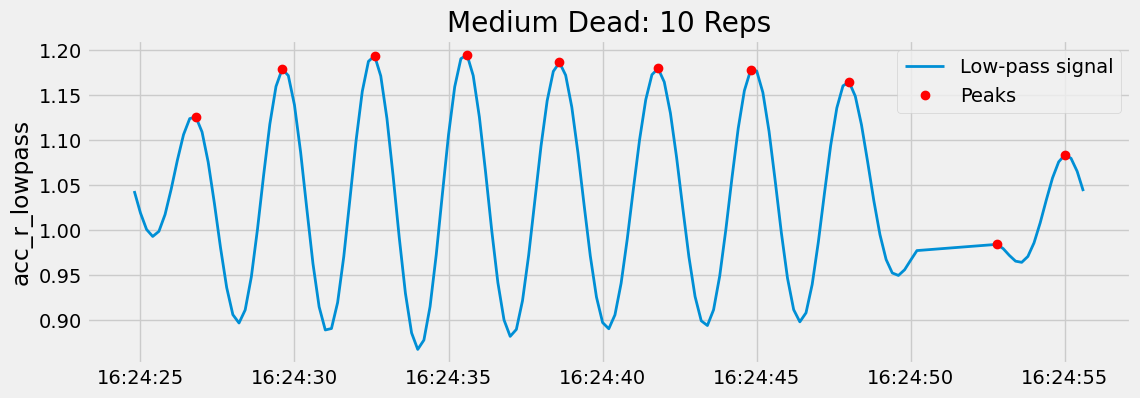

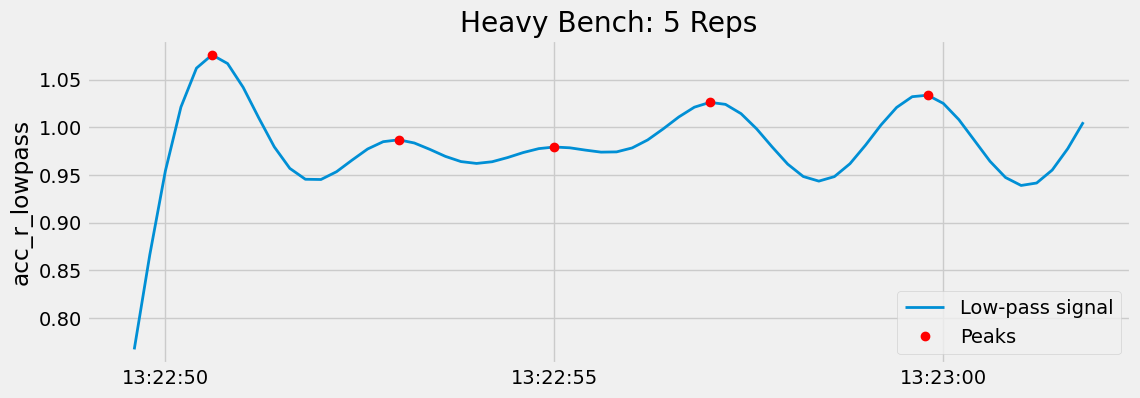

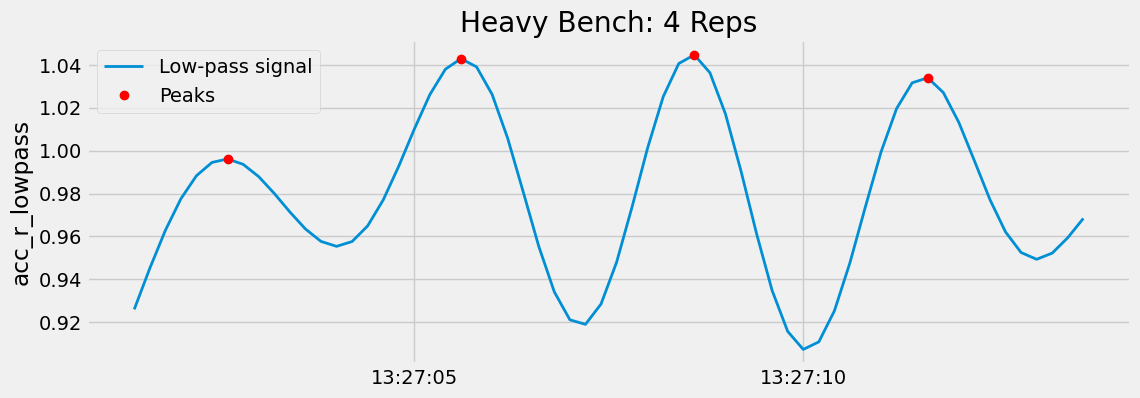

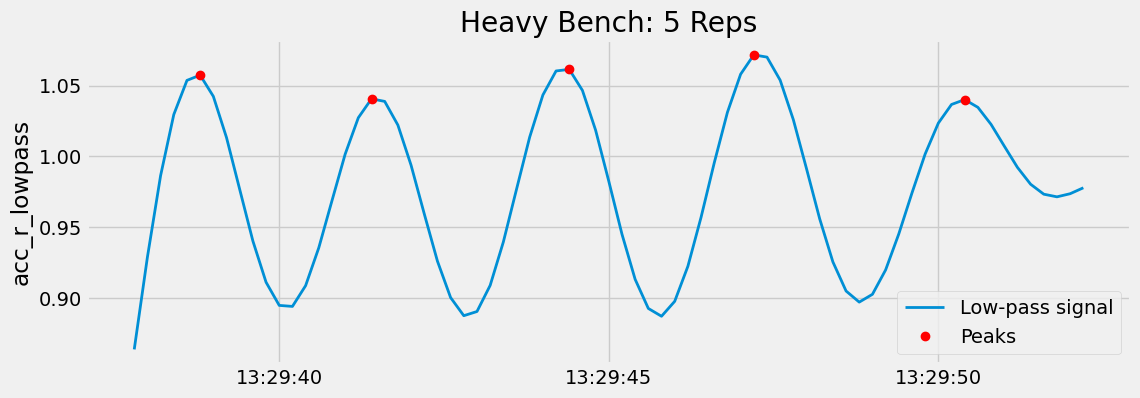

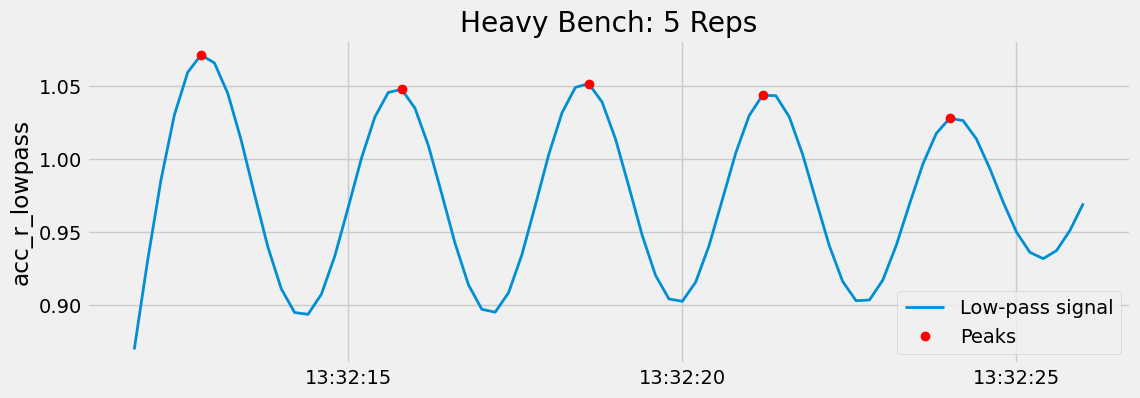

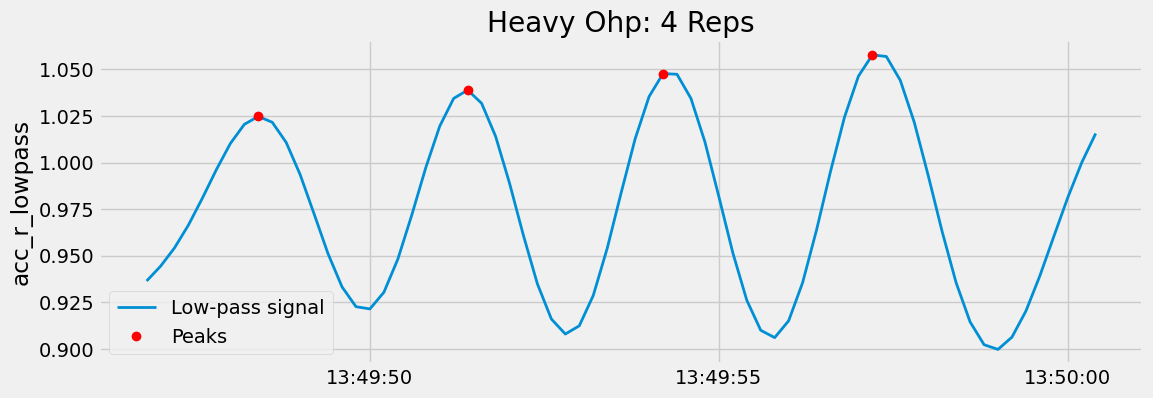

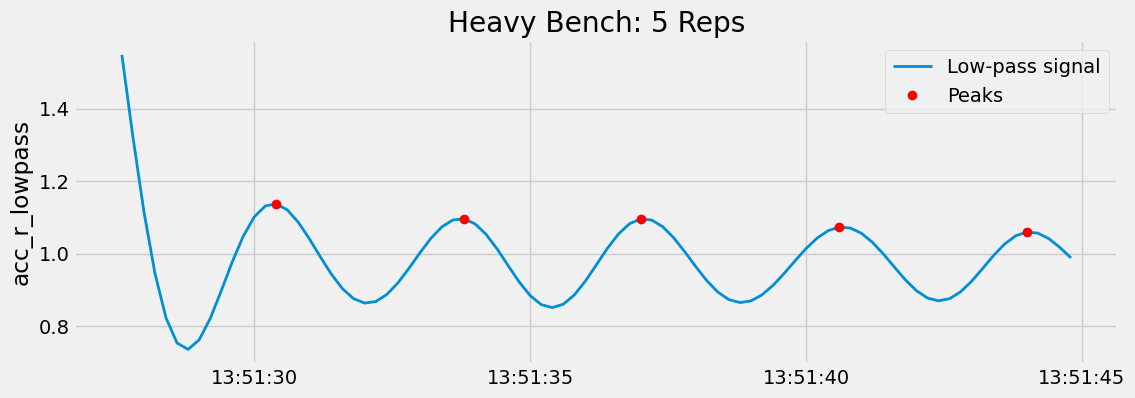

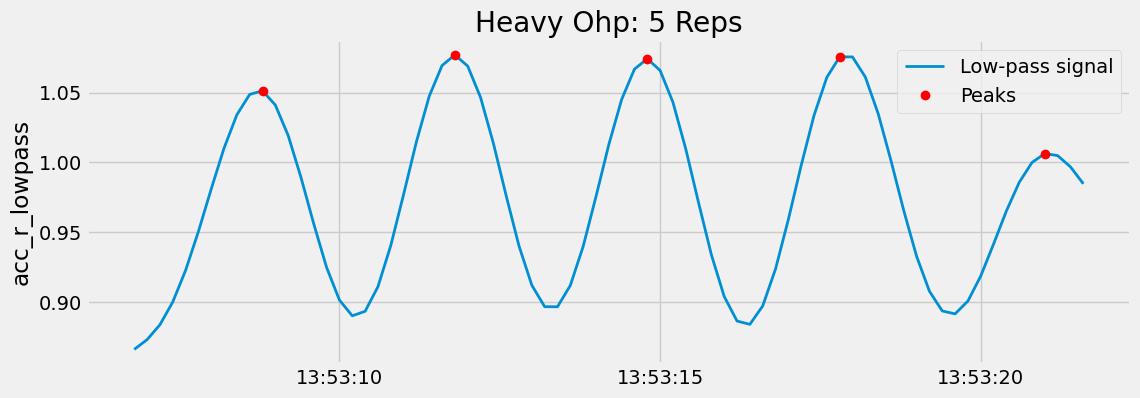

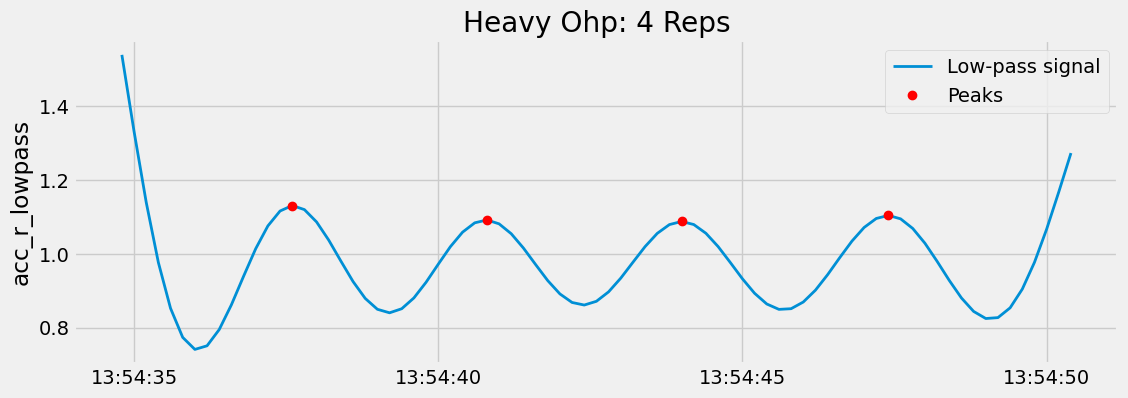

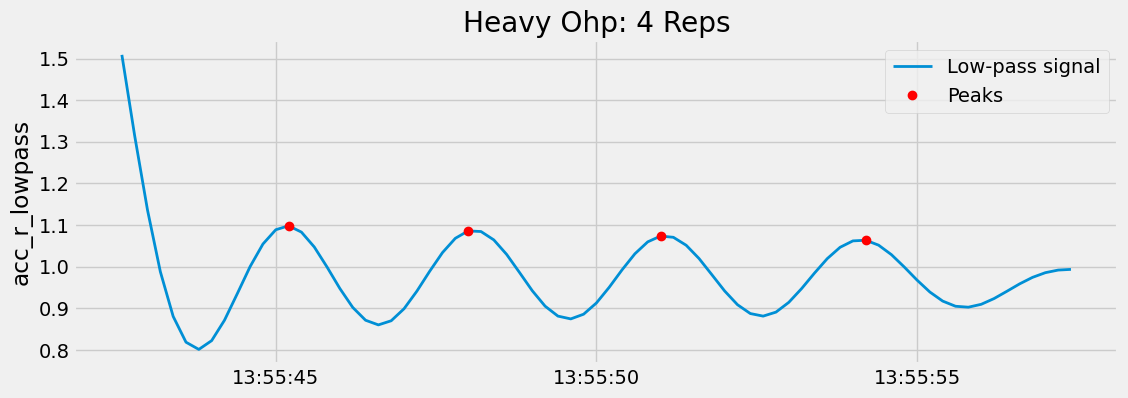

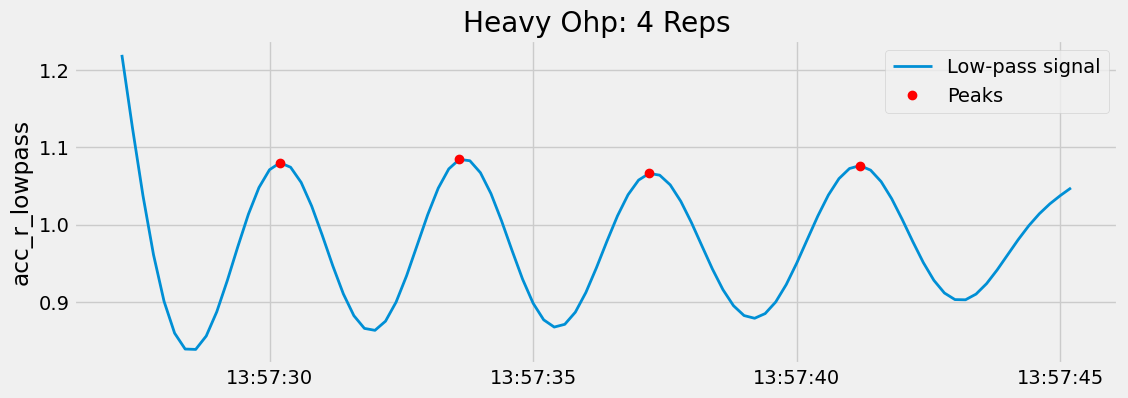

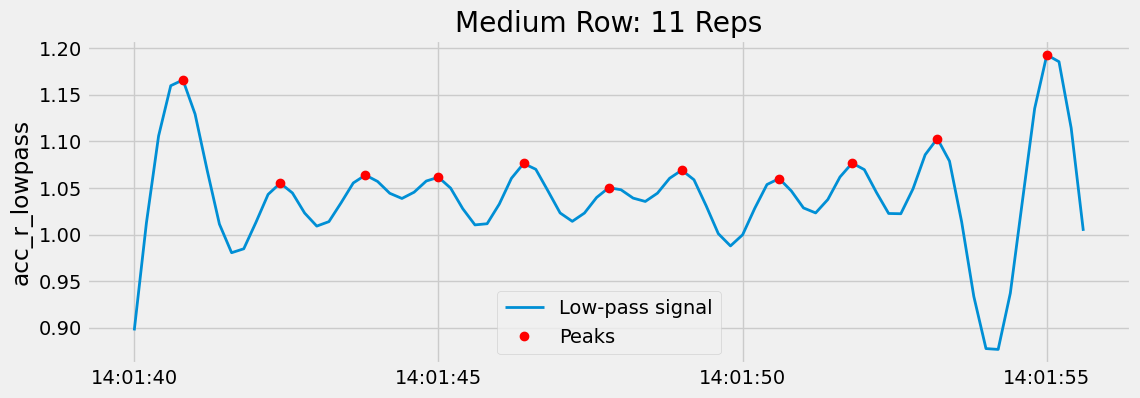

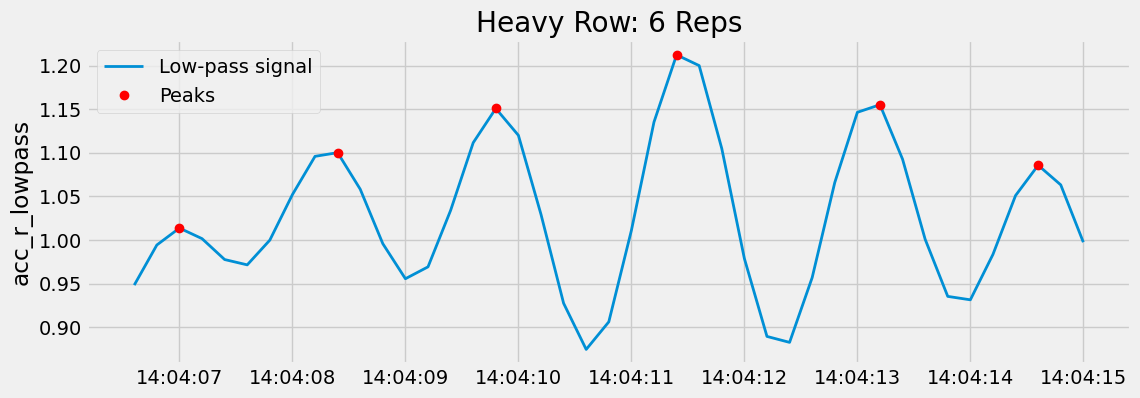

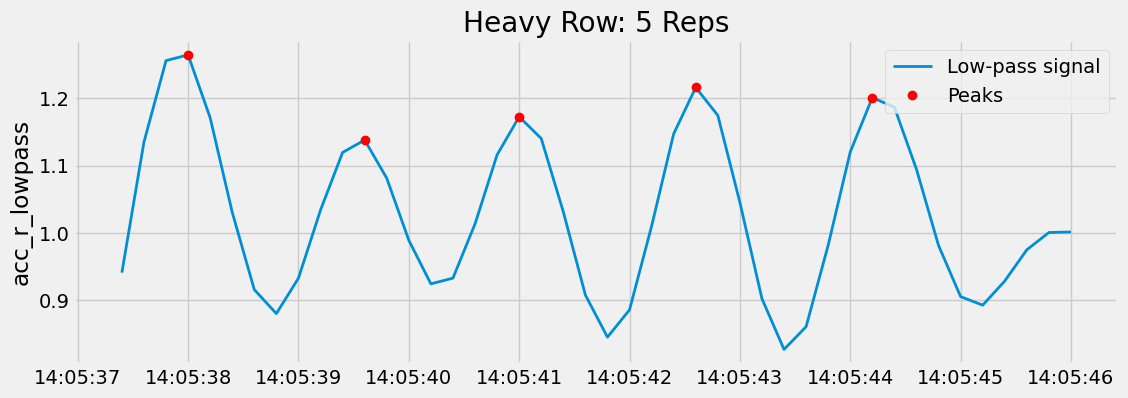

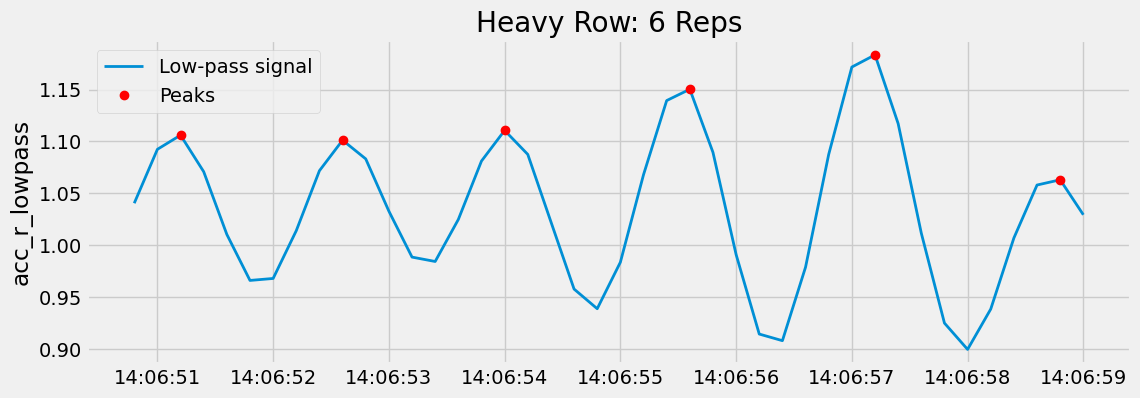

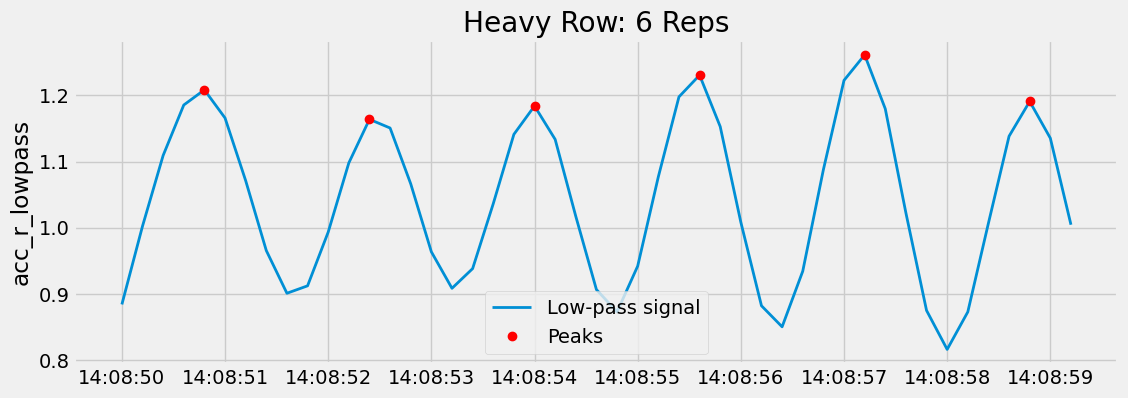

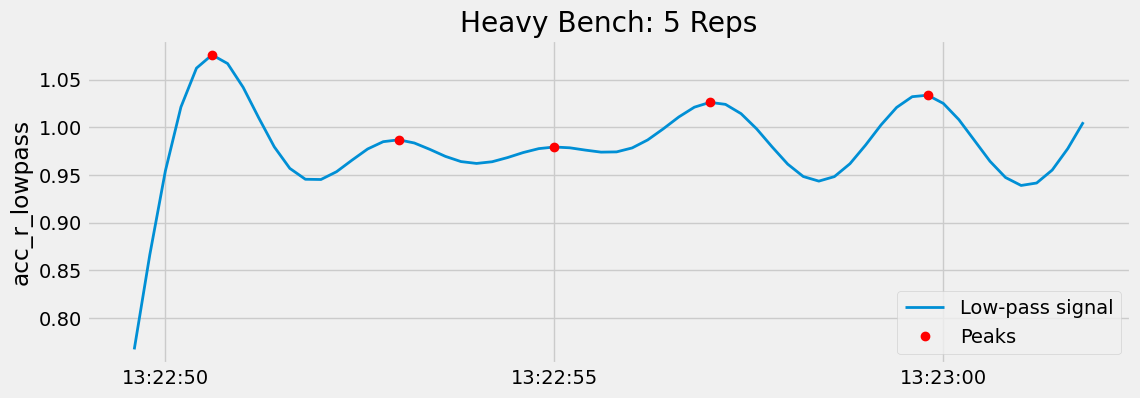

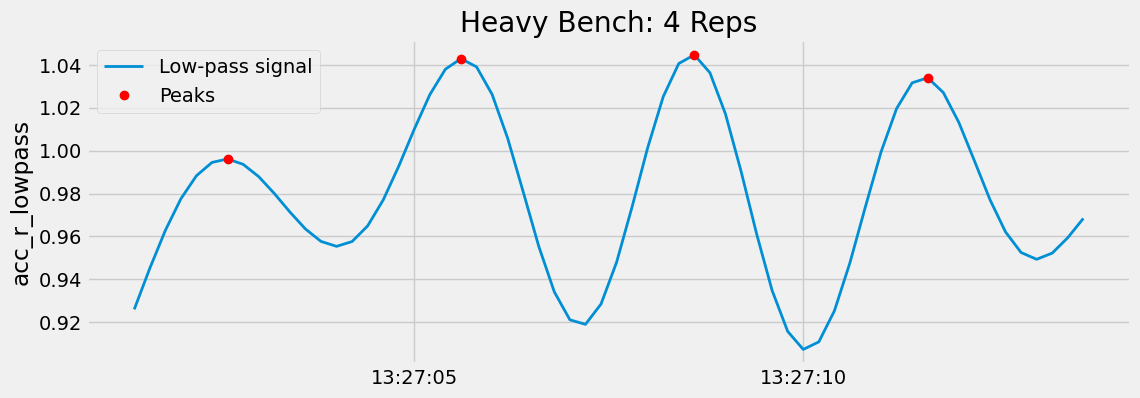

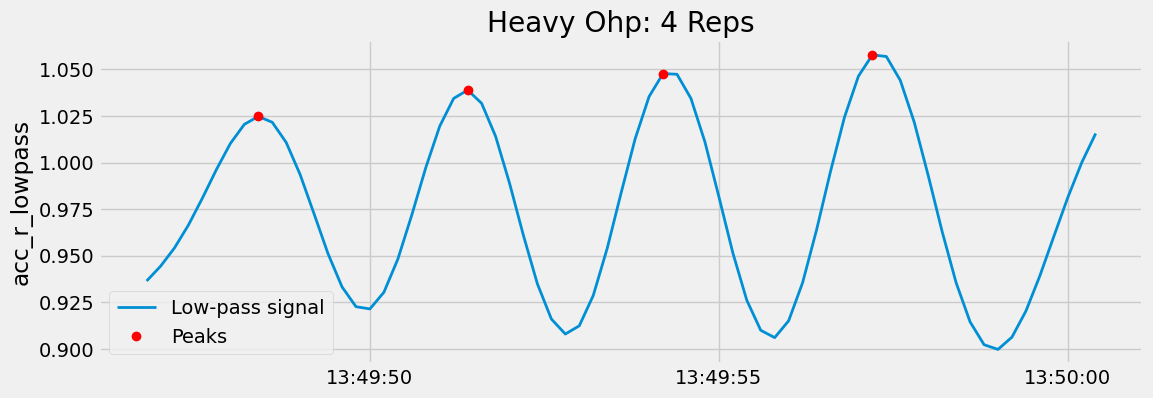

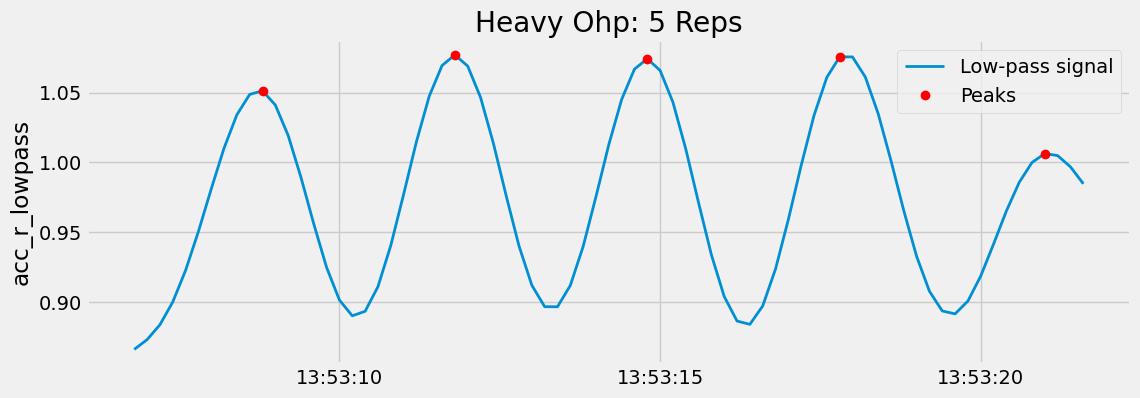

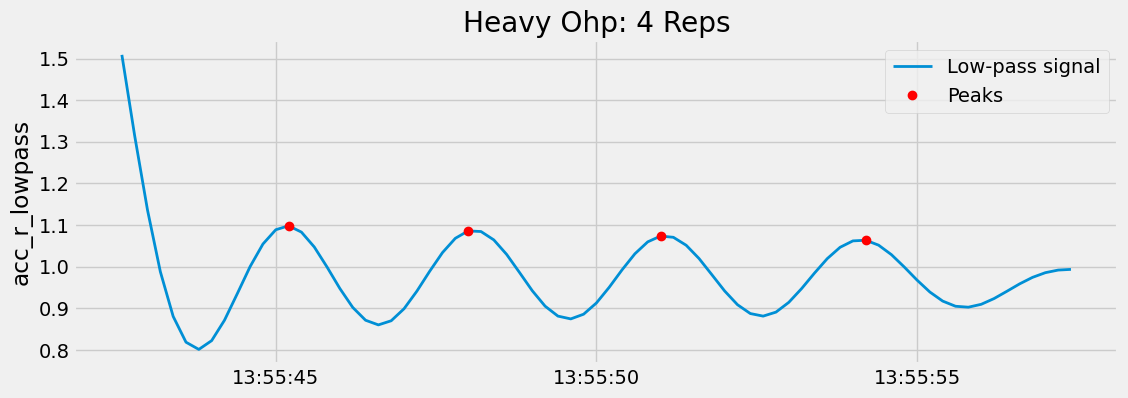

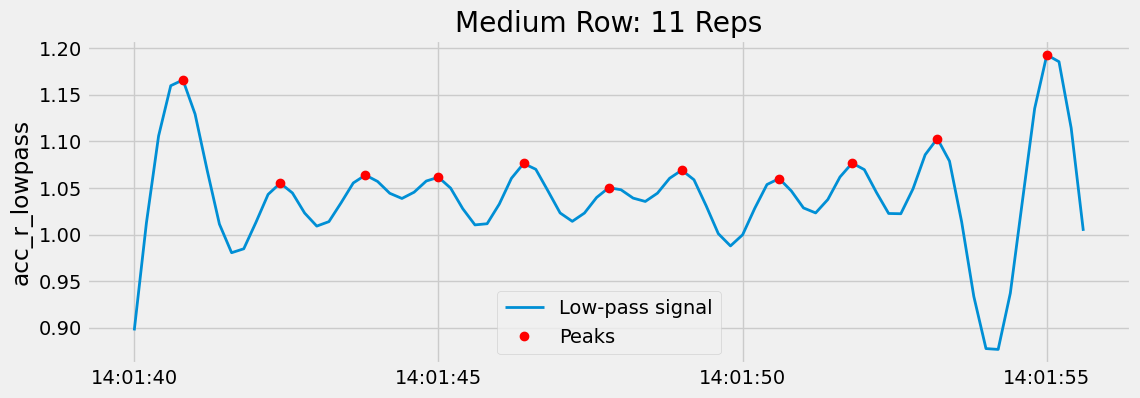

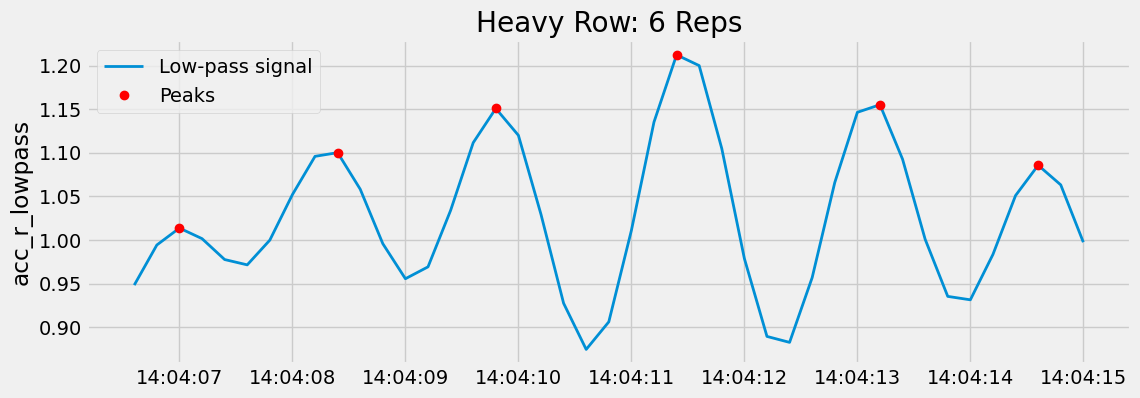

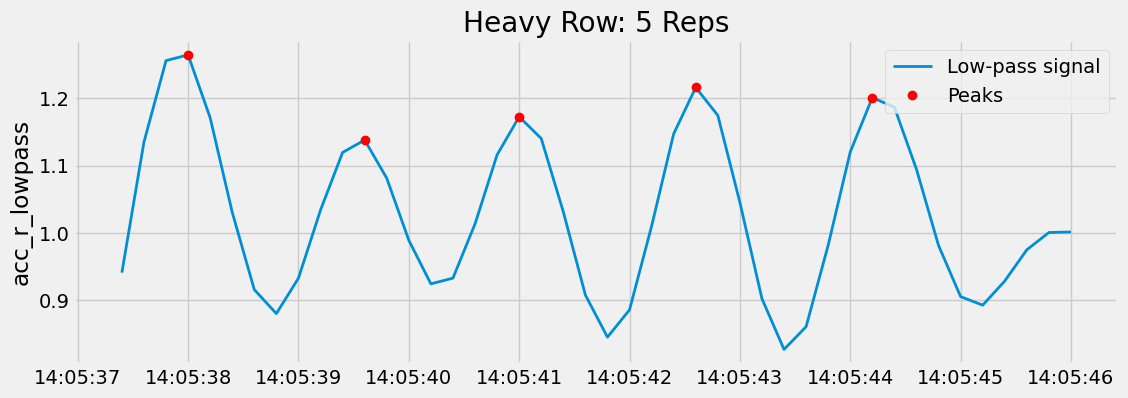

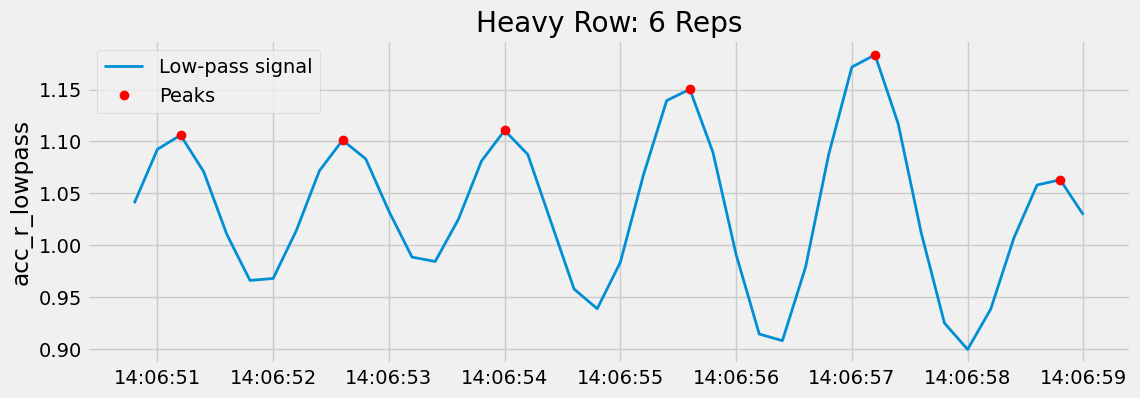

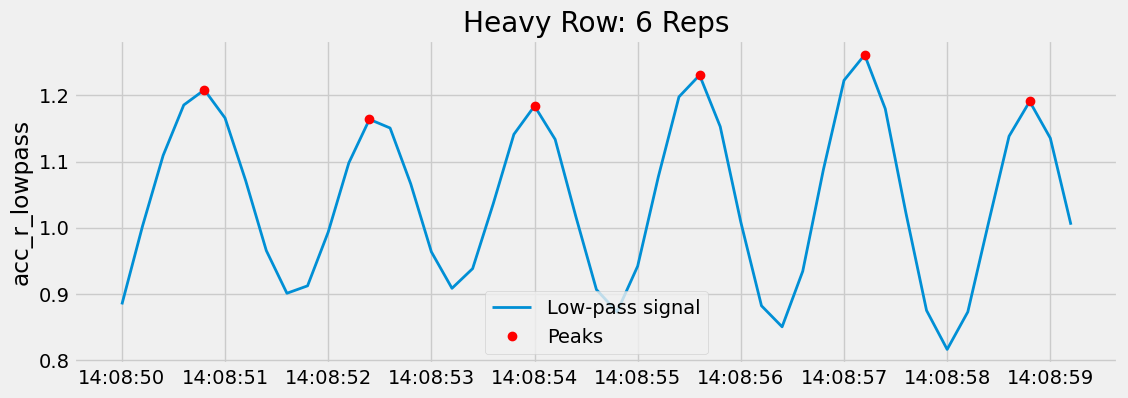

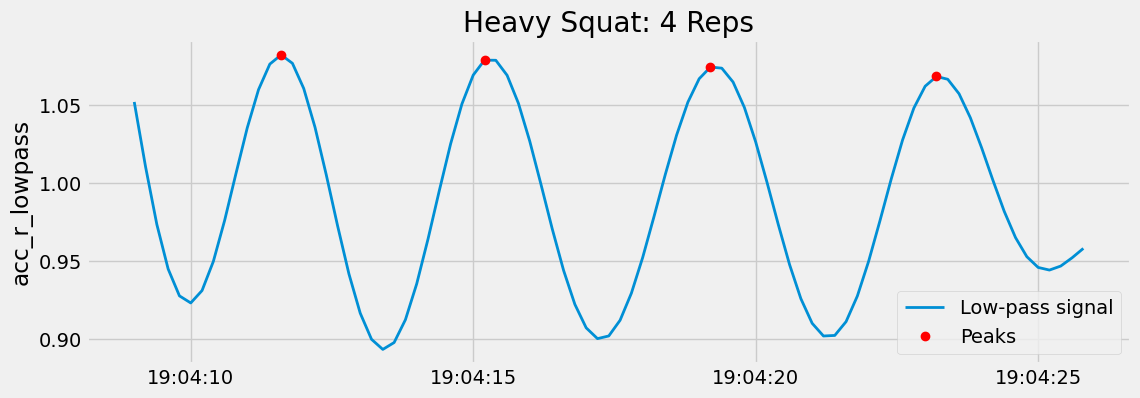

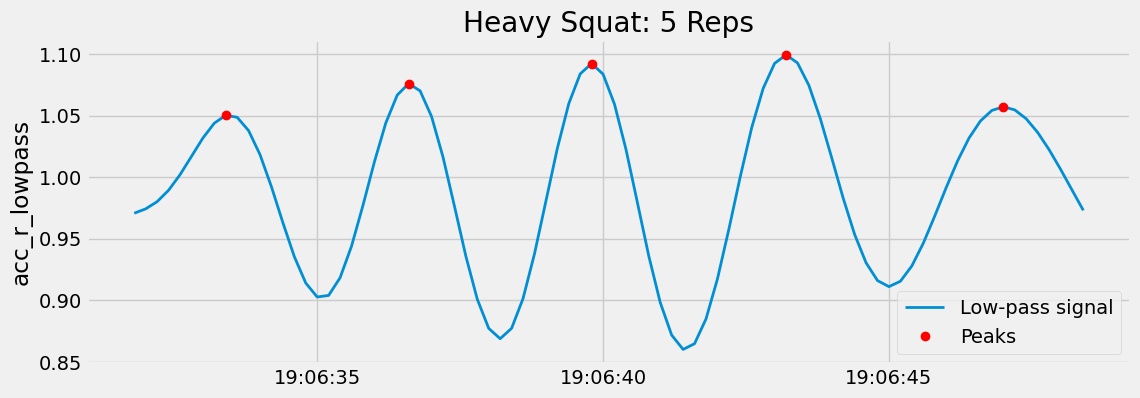

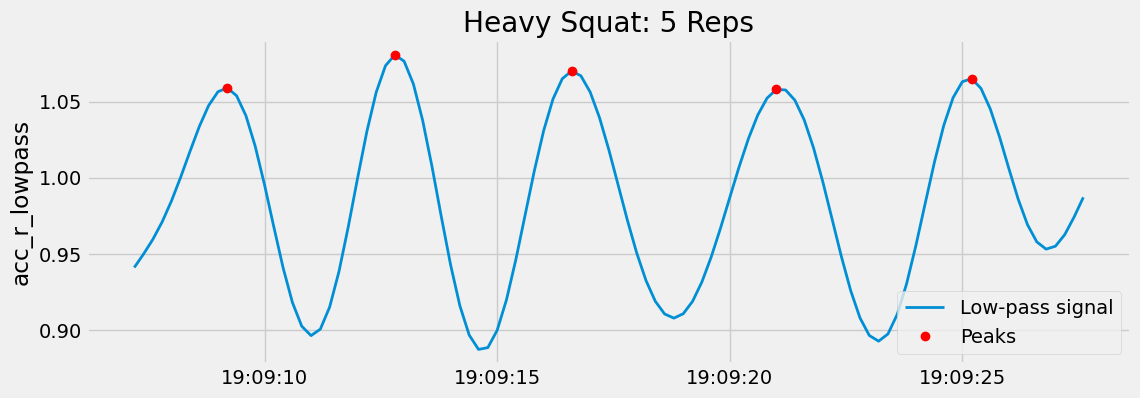

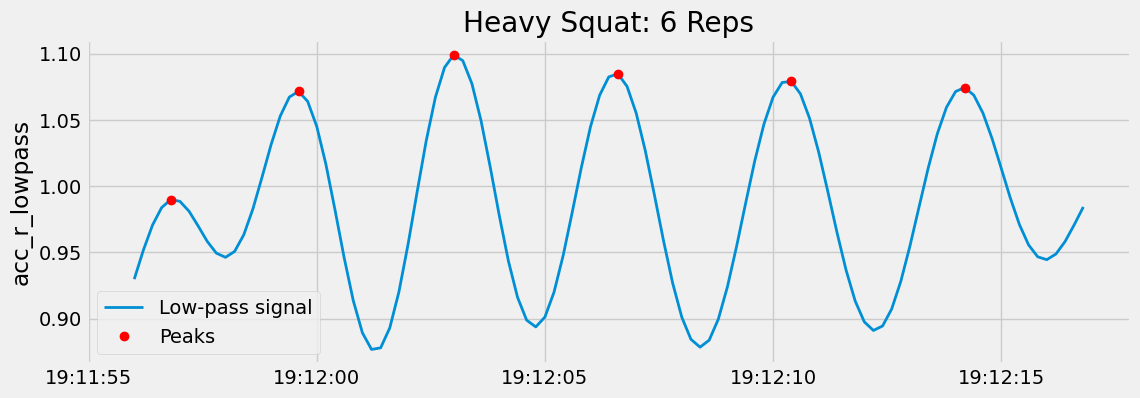

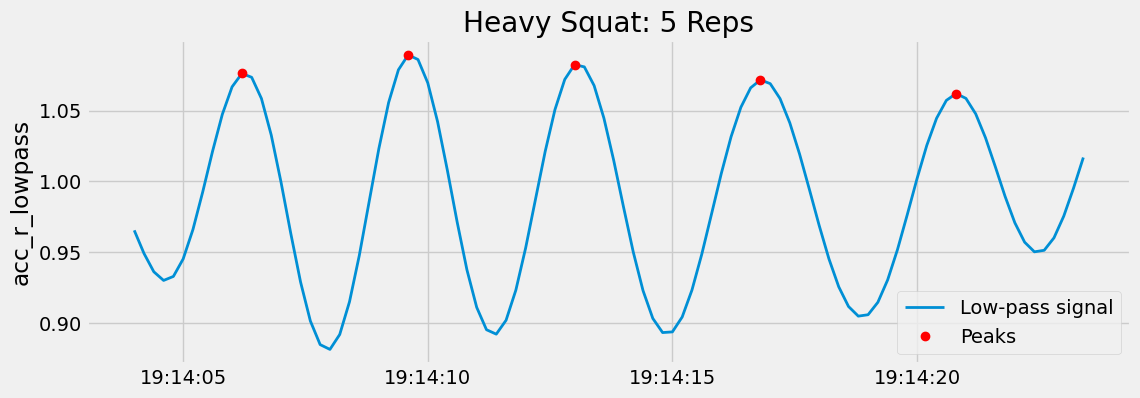

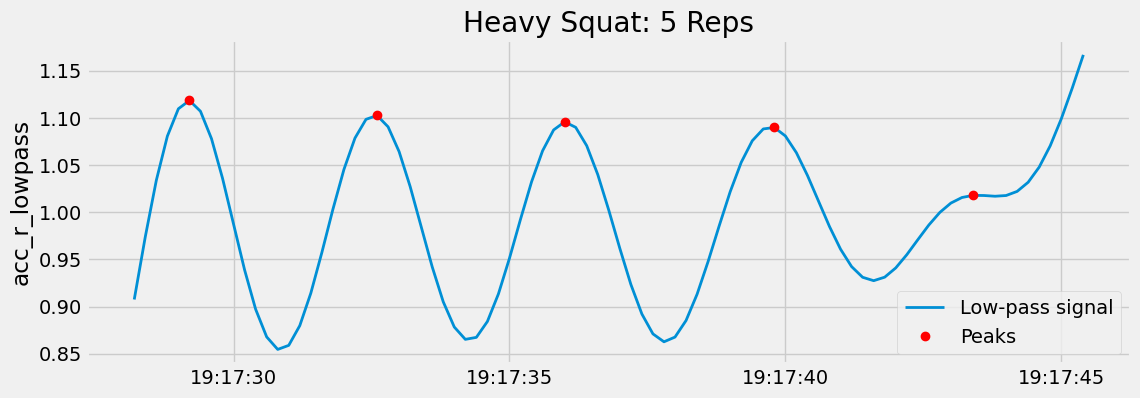

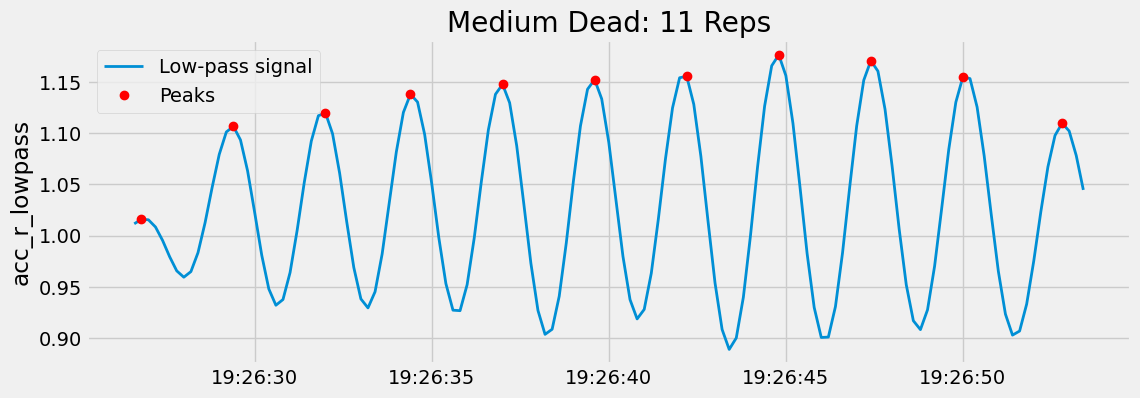

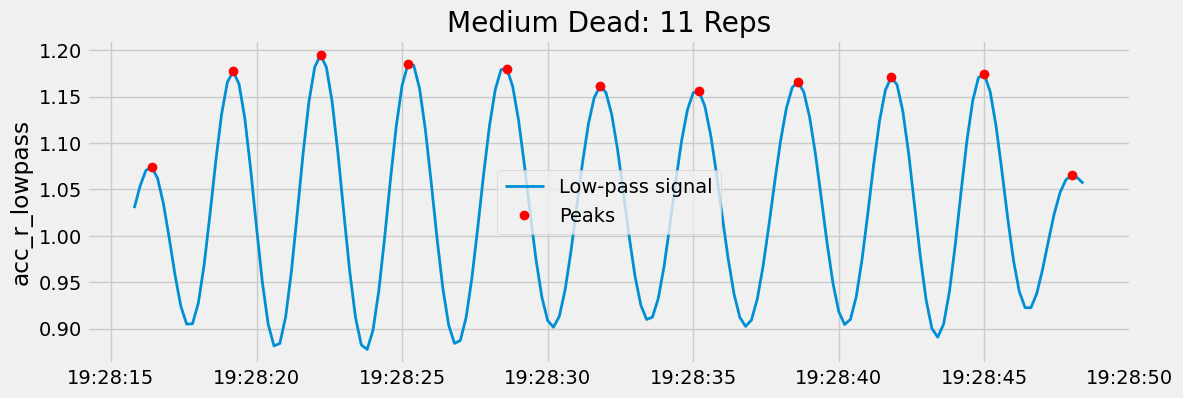

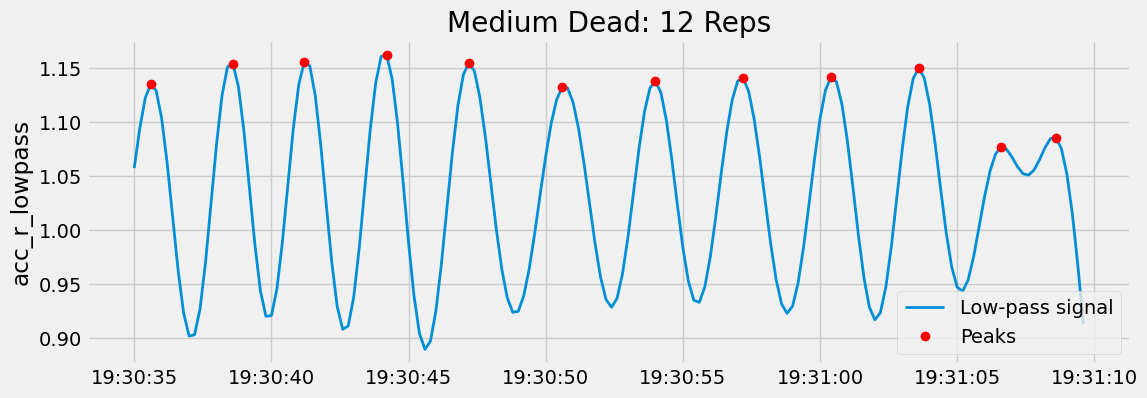

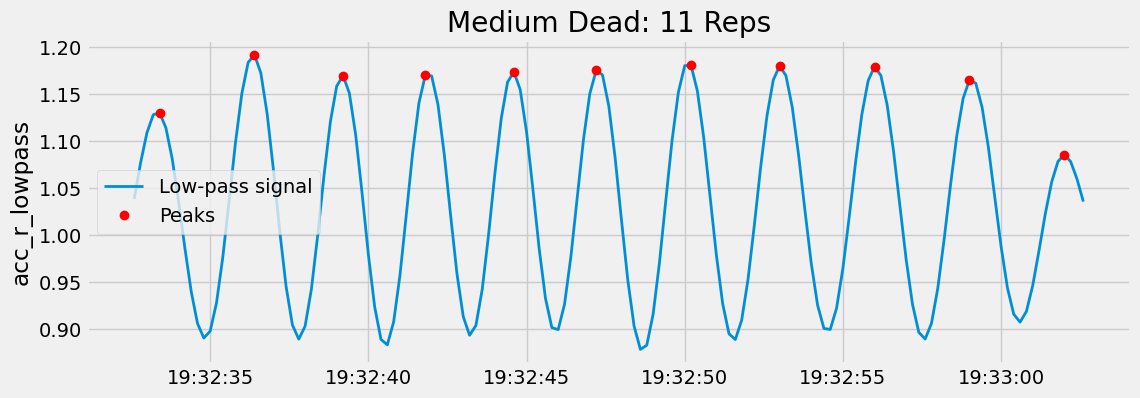

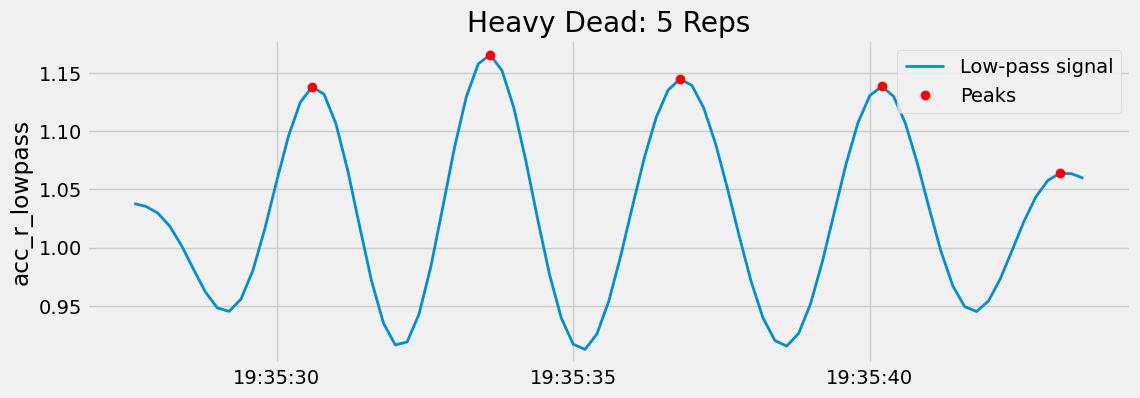

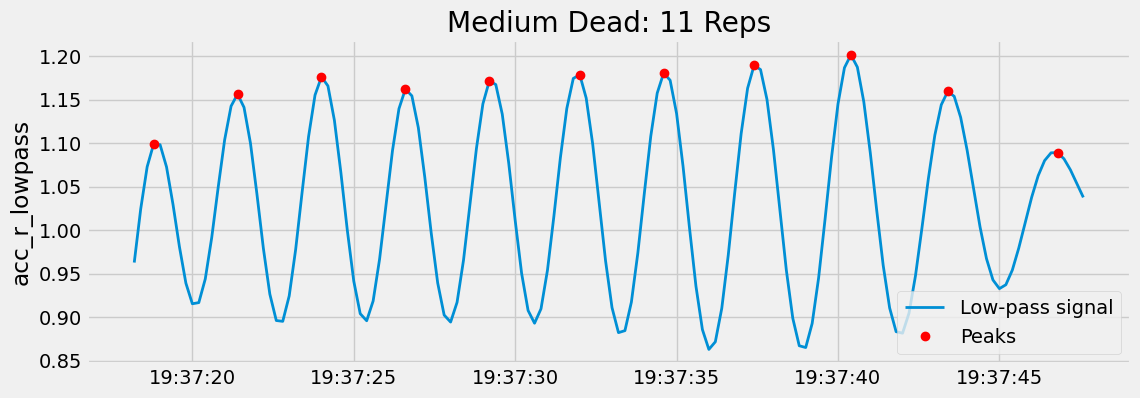

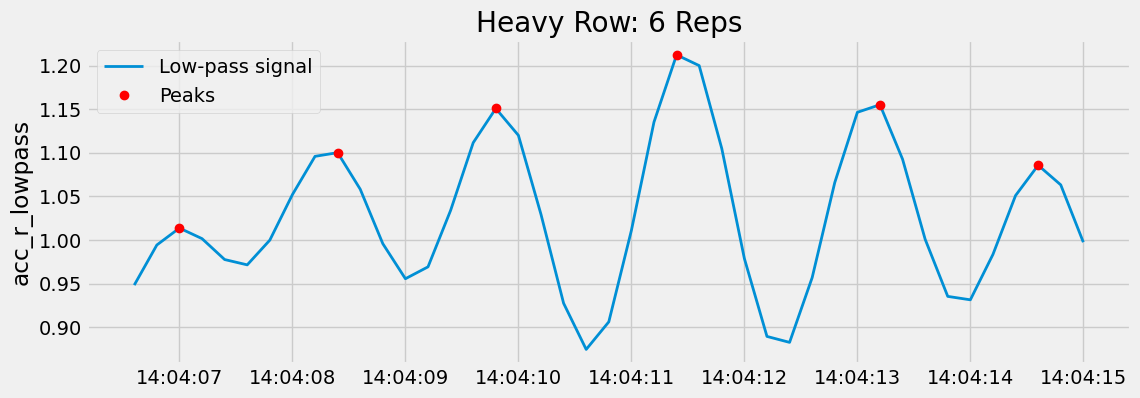

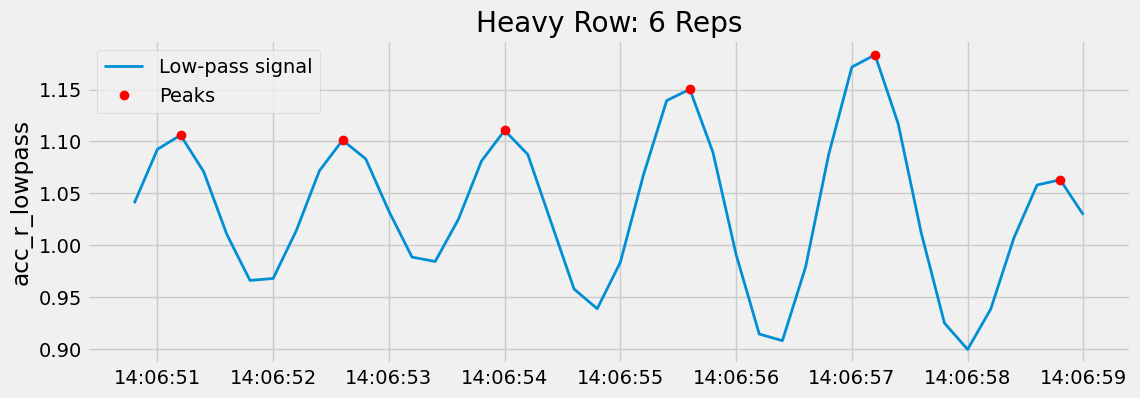

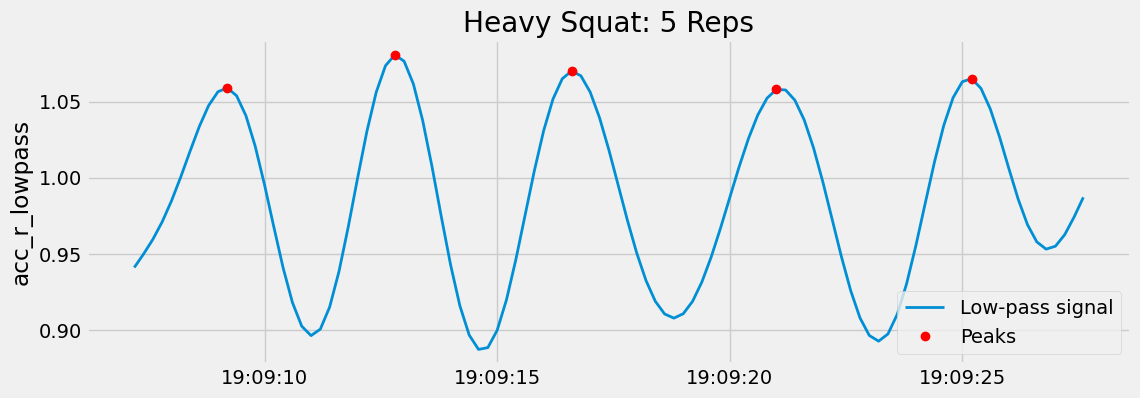

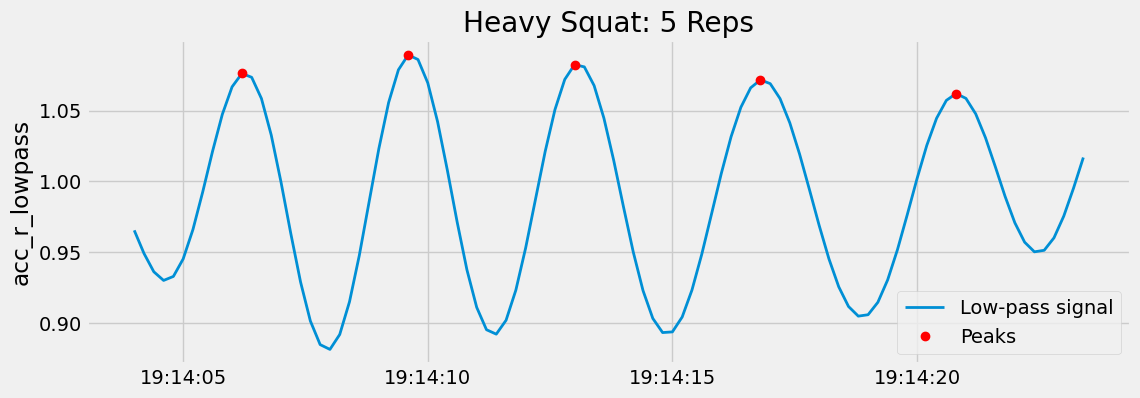

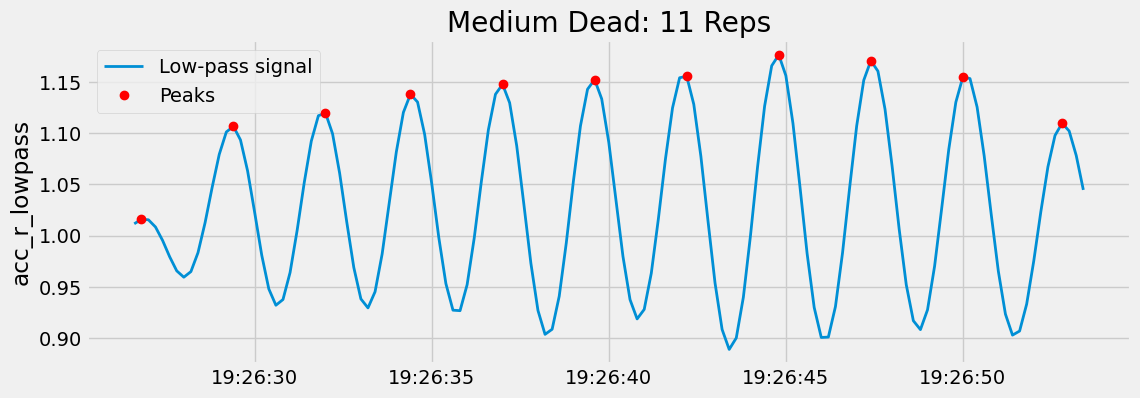

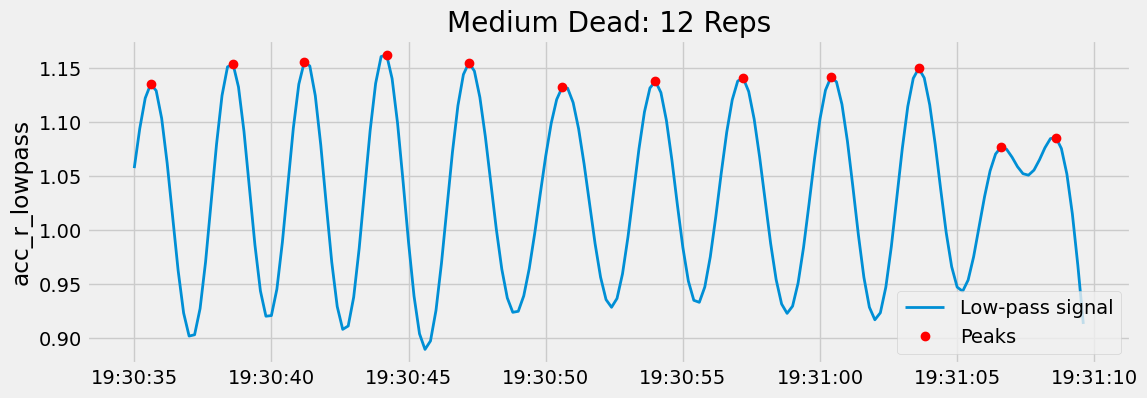

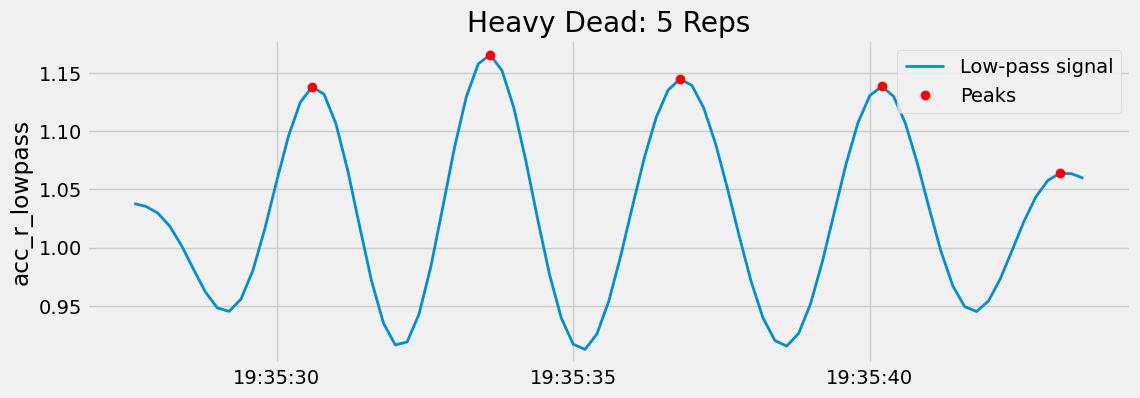

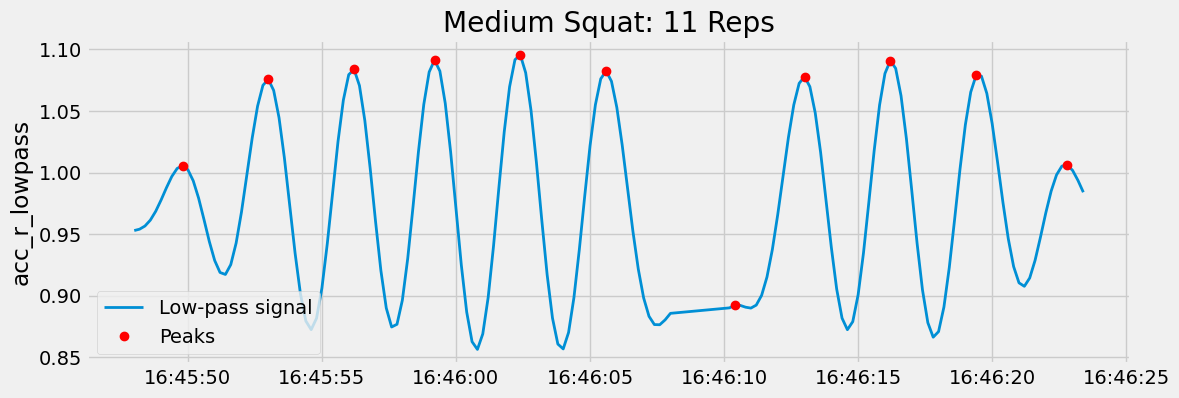

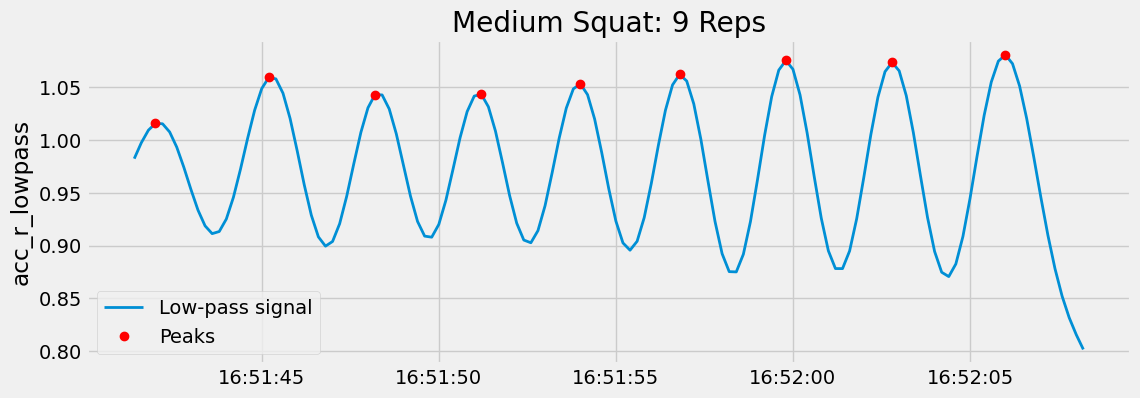

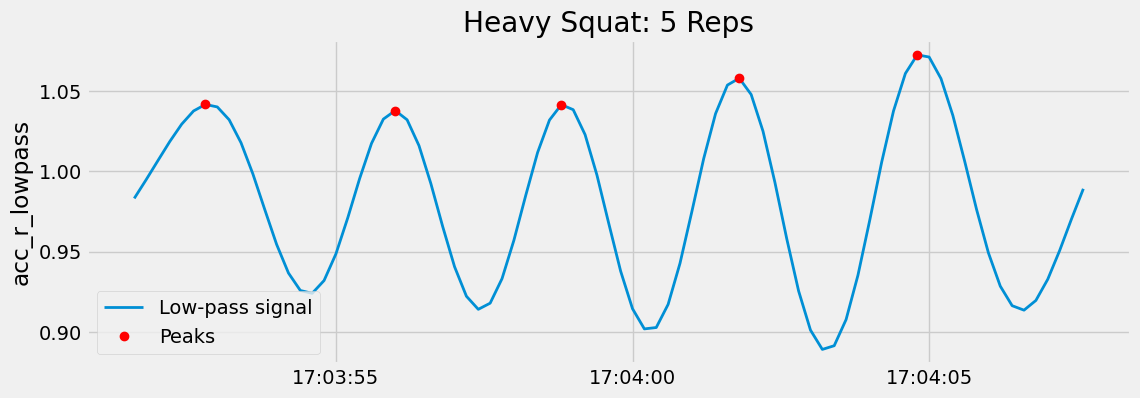

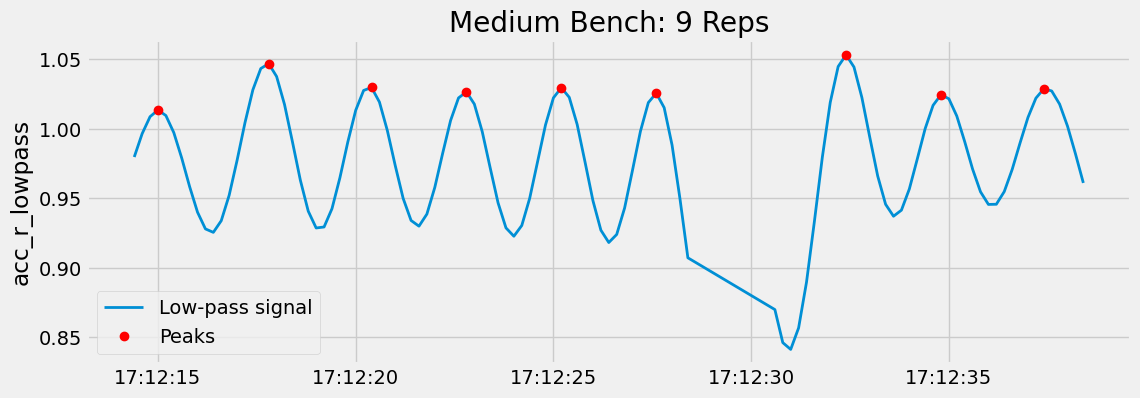

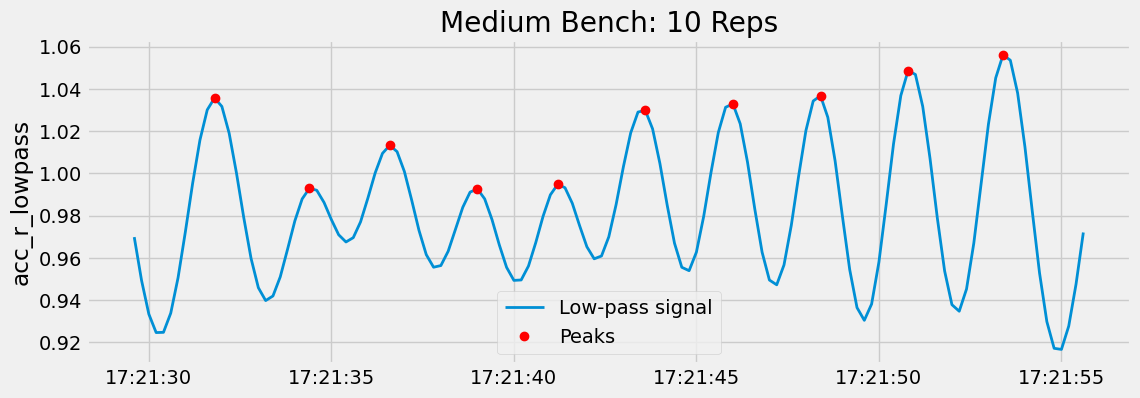

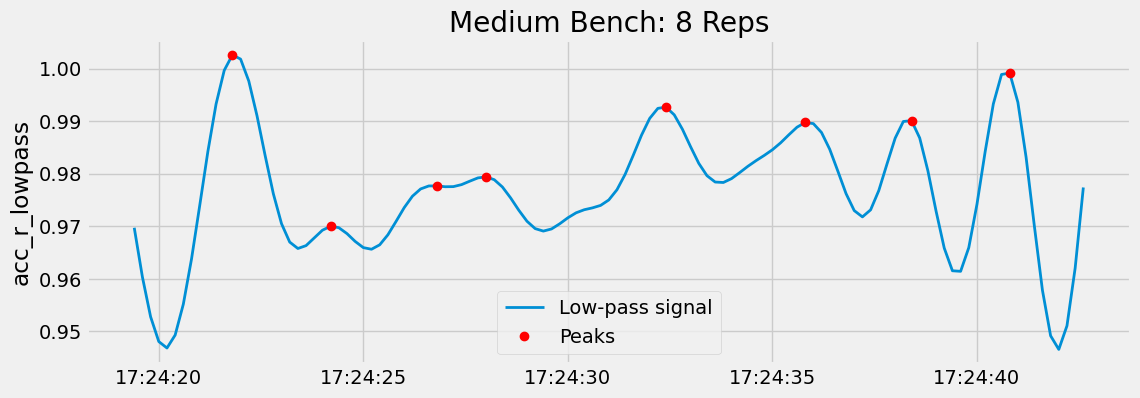

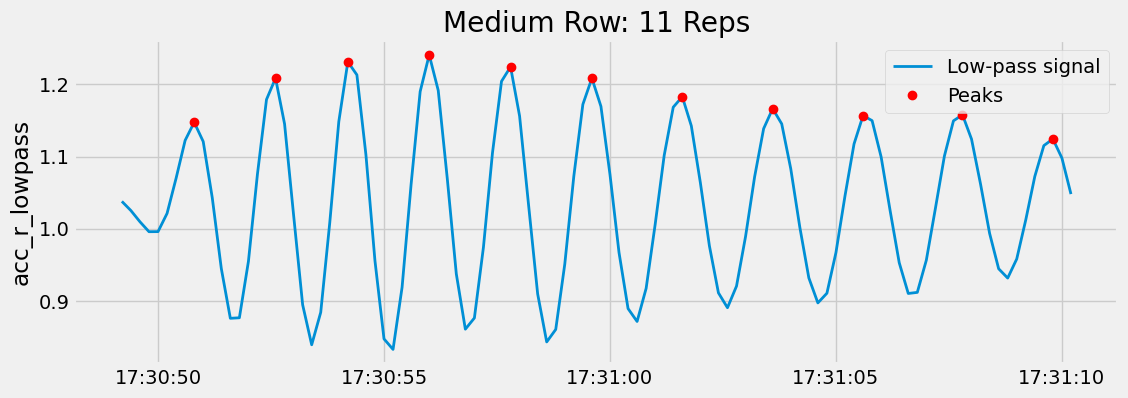

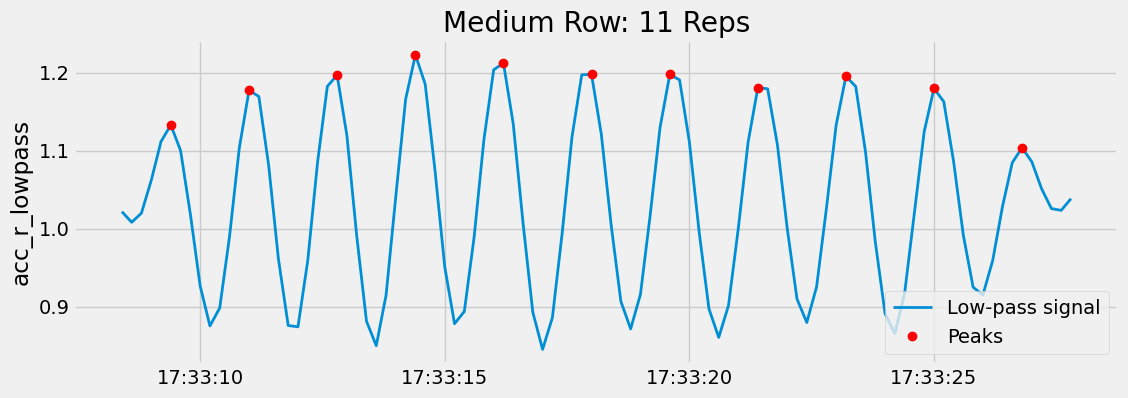

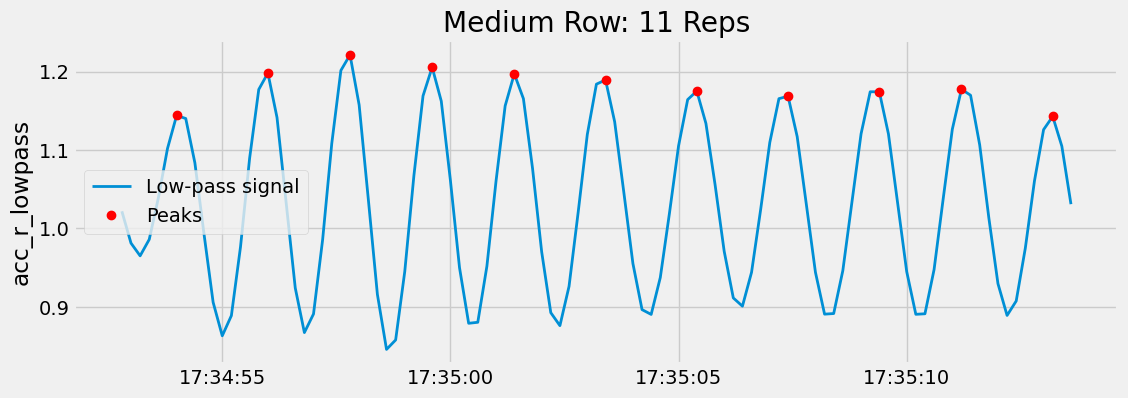

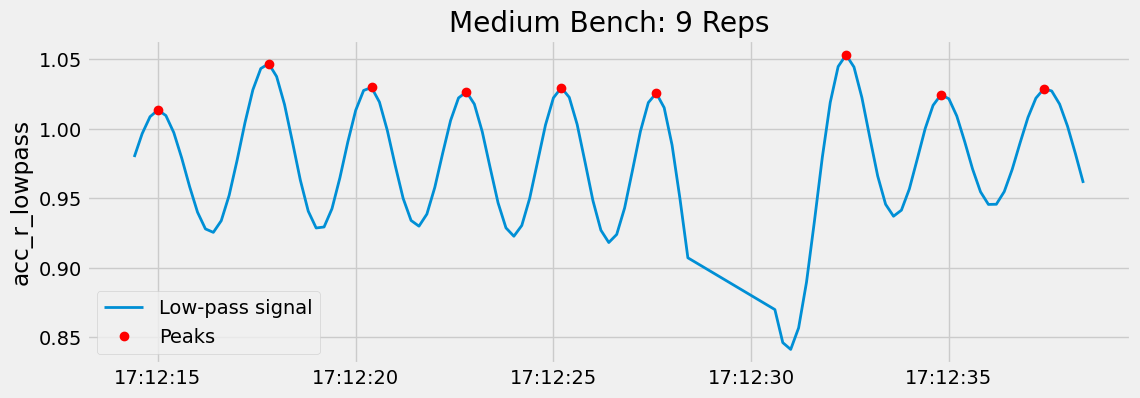

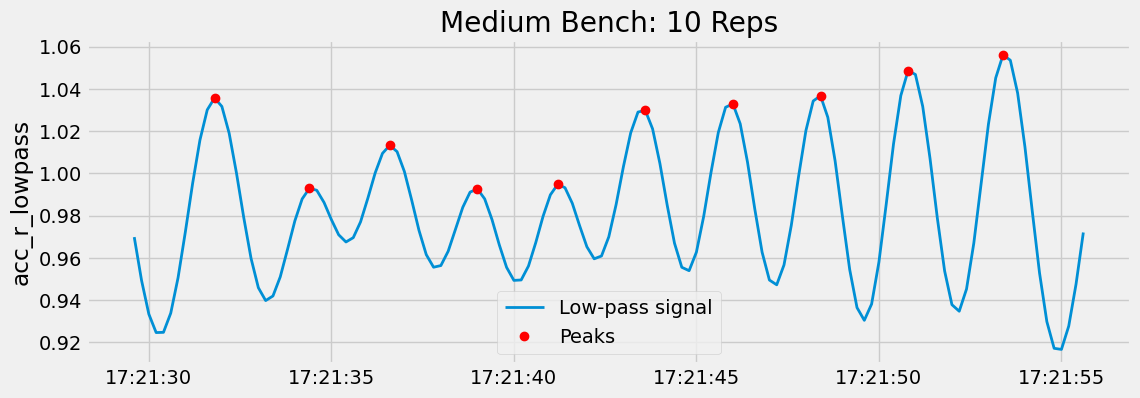

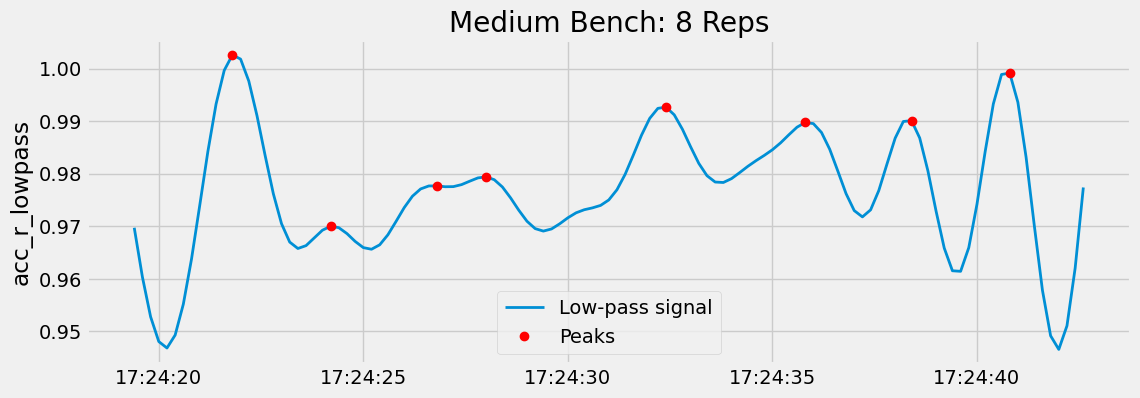

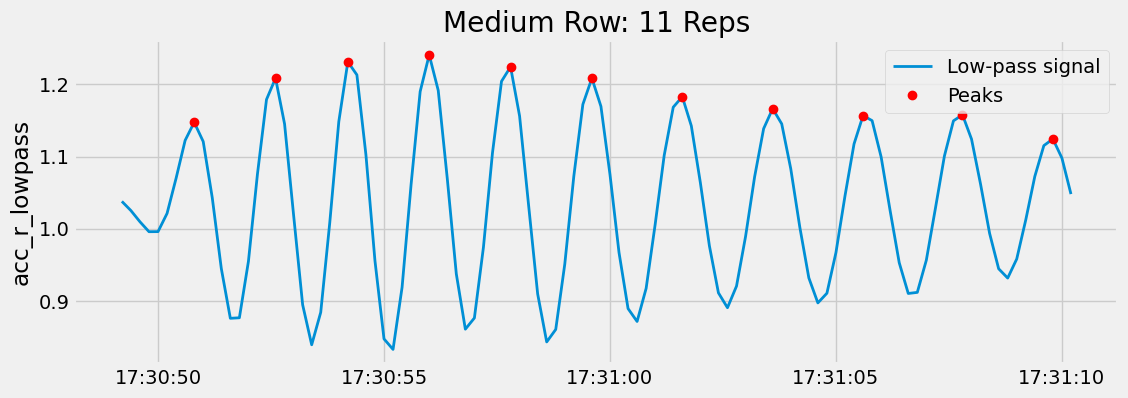

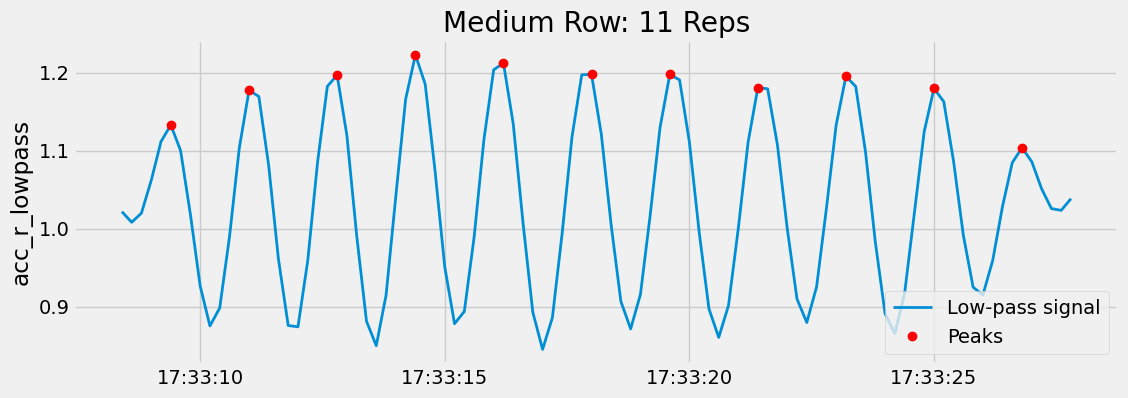

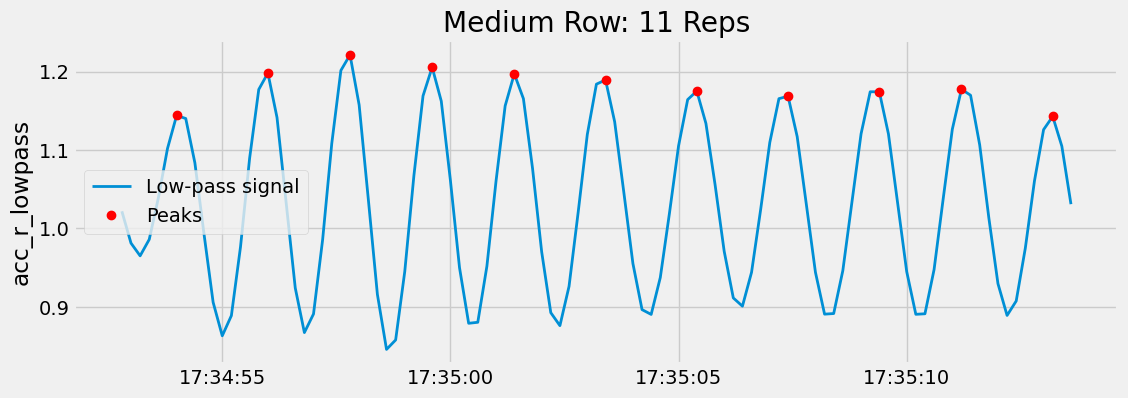

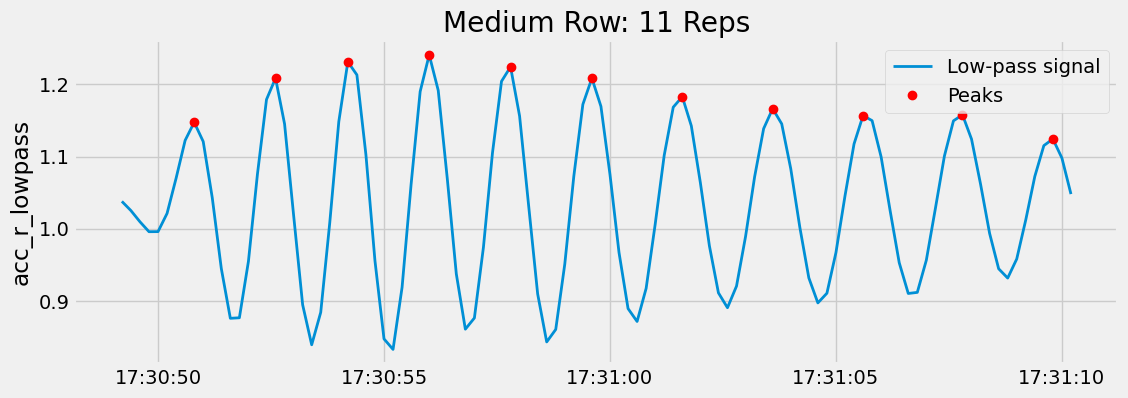

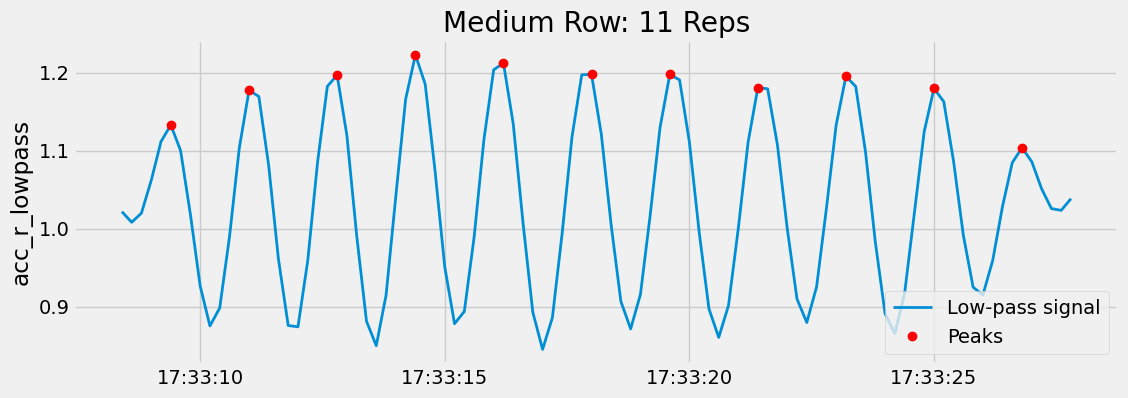

In [70]:
for s in df["set"].unique():
    subset = df[df["set"] == s]

    column = "acc_r"
    cutoff = 0.4

    if subset["label"].iloc[0] == "squat":
        cutoff = 0.35

    if subset["label"].iloc[0] == "row":
        cutoff = 0.65
        col = "gyro_x"
    
    if subset["label"].iloc[0] == "ohp":
        cutoff = 0.35

    reps = count_reps(subset, cutoff=cutoff, column=column)

    rep_df.loc[rep_df["set"] == s, "reps_pred"] = reps

In [71]:
rep_df

label category  set  reps  reps_pred
0   bench    heavy    1     5          5
1   bench    heavy    2     5          4
2   bench    heavy    3     5          5
3   bench    heavy    4     5          5
4   bench    heavy   30     5          5
..    ...      ...  ...   ...        ...
80  squat   medium   28    10          8
81  squat   medium   29    10          8
82  squat   medium   38    10          7
83  squat   medium   63    10         11
84  squat   medium   64    10          9

[85 rows x 5 columns]

In [74]:
# Evaluate the results
error = error = round(
    mean_absolute_error(rep_df["reps"], rep_df["reps_pred"]),
    2
)
error

1.02

<Axes: xlabel='label,category'>

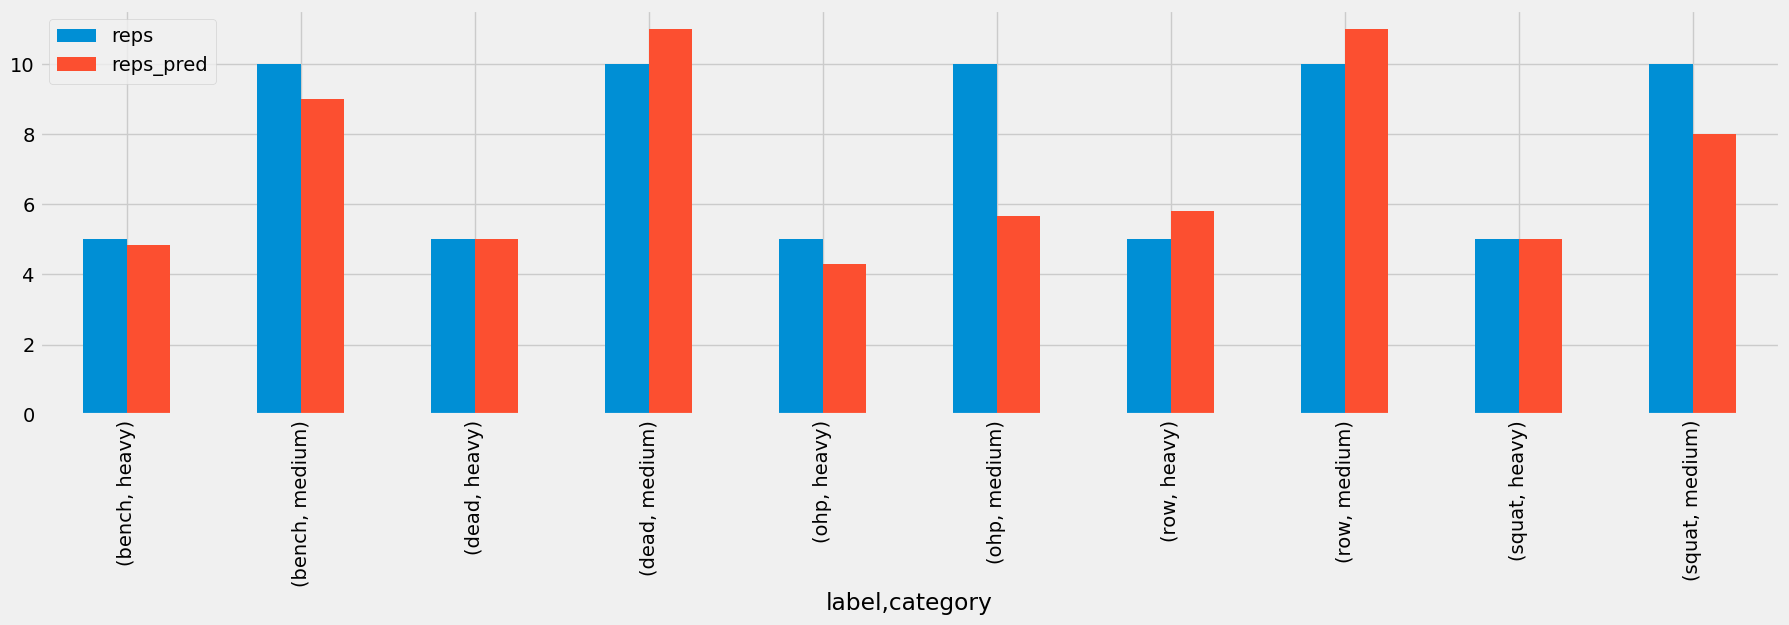

In [76]:
rep_df.groupby(["label", "category"])[["reps", "reps_pred"]].mean().plot.bar()